In [1]:
# import
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

In [39]:
# paths
csv_path = './outputs/Vel30_invert_AllTest_results_1014.csv'

In [40]:
datasets = pd.read_csv(csv_path)
datasets.head()

,subject_ids,subject_ages,disease_condition,scan_cdr,ven_thc_0,ven_thc_0.5,ven_thc_0.8,ven_thc_0.99,ven_tad_0,ven_tad_0.5,...,vendiff_tad_0.8,vendiff_tad_0.99,hippdiff_thc_0,hippdiff_thc_0.5,hippdiff_thc_0.8,hippdiff_thc_0.99,hippdiff_tad_0,hippdiff_tad_0.5,hippdiff_tad_0.8,hippdiff_tad_0.99
0,OAS30007,71.753423,1,0.0,12.801817,12.442716,12.072778,11.217049,0.058945,0.059340,...,0.031150,0.037195,0.442171,0.453288,0.561077,0.473756,0.001294,0.001401,0.001788,0.002626
1,OAS30007,76.082190,1,0.0,18.588986,17.698608,16.346982,17.357222,0.042957,0.043104,...,0.022040,0.026247,0.455013,0.508335,0.590692,0.509429,0.000854,0.000905,0.001090,0.001436
2,OAS30007,77.013697,1,0.0,20.106173,19.278327,17.923225,16.467512,0.038464,0.038663,...,0.020436,0.023965,0.467145,0.506093,0.614210,0.298866,0.000830,0.000886,0.001070,0.001411
3,OAS30007,82.016437,1,0.5,22.528291,21.970212,21.043249,24.619455,0.030721,0.030761,...,0.016816,0.020765,0.612958,0.666625,0.785694,0.532487,0.000672,0.000712,0.000880,0.001093
4,OAS30013,71.345252,1,0.5,17.192559,16.747429,15.188345,18.980775,0.051020,0.051044,...,0.027126,0.036962,0.294826,0.286907,0.347357,0.142187,0.001187,0.001262,0.001700,0.001727


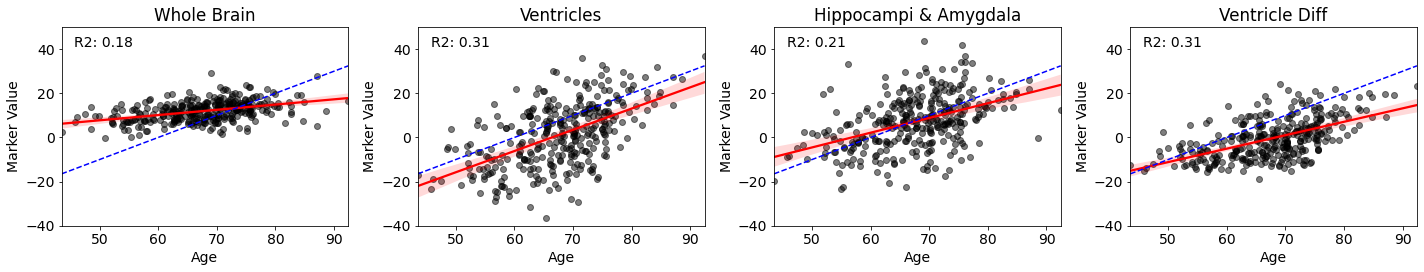

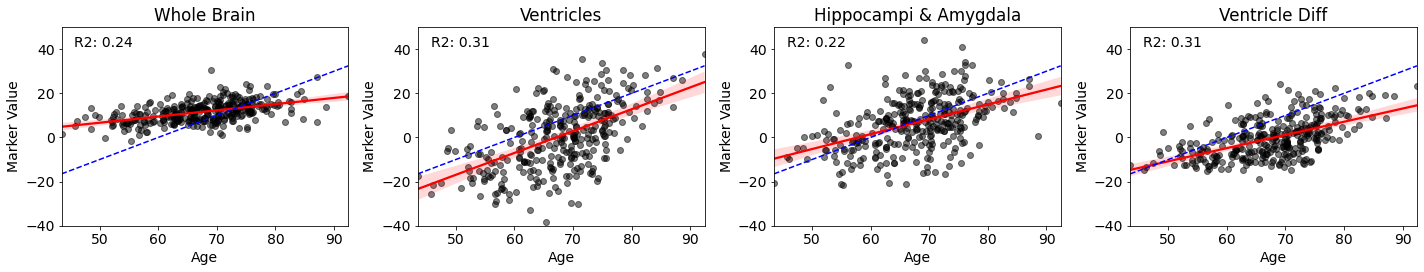

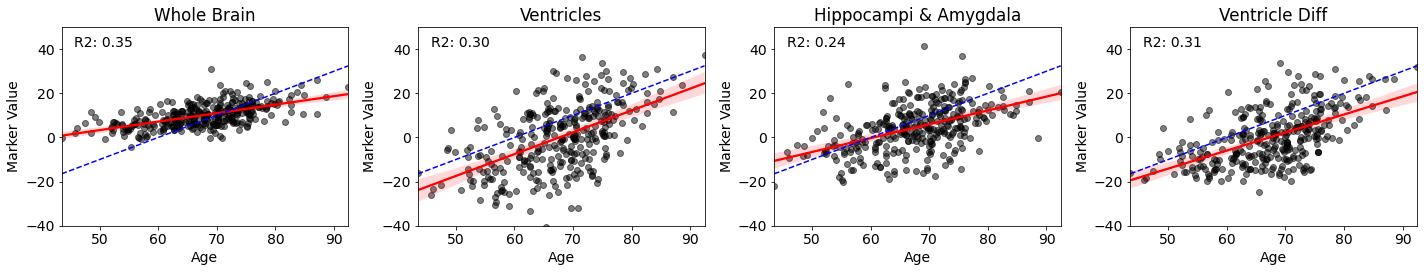

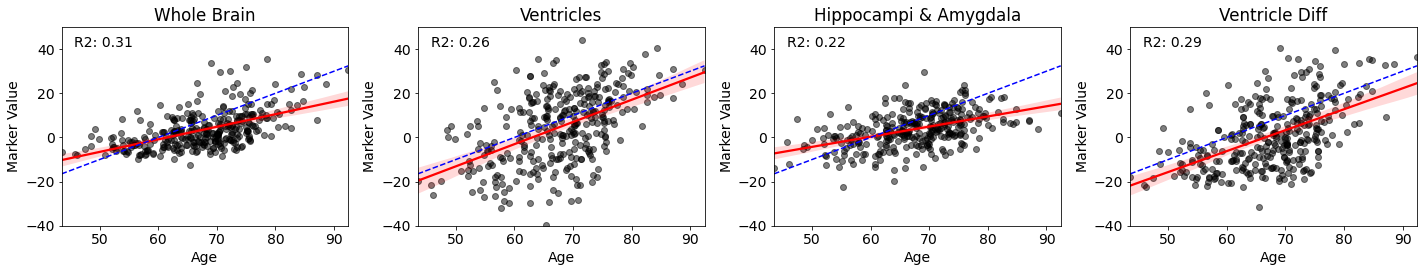

In [41]:
# 1. test biomarker-age relations
def plot_1x4_fitted_line(df, th, save_name,  ci=80):
    plt.rcParams.update({'font.size': 14})

    df = df.drop(df[(df.disease_condition == 1)].index)
    
    # Define the line equation
    line_eq = lambda x: x - 60

    # Plot the data points and the linear line
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

    # Iterate over each subplot
    plot_titles = ["Whole Brain", "Ventricles", "Hippocampi & Amygdala", "Ventricle Diff"]
    for i, ax in enumerate(axs):
        # Get the column name based on the subplot index
        column_name = f'wb_thc_{th}' if i == 0 else f'ven_thc_{th}' if i == 1 else f'hipp_thc_{th}' if i == 2 else f'vendiff_thc_{th}'

        # Plot the data points and the linear line
        sns.regplot(x='subject_ages', y=column_name, data=df, ax=ax,
                    scatter_kws={"color": "black", "alpha": 0.5},
                    line_kws={"color": "red"},
                    ci=ci)

        # Add the line with the equation y = x - 60
        x_vals = np.array(ax.get_xlim())
        ax.plot(x_vals, line_eq(x_vals), linestyle='dashed', color='blue')

        # Calculate R2 value
        x = df['subject_ages']
        y = df[column_name]
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        r_squared = r_value ** 2

        # Set the title and axis labels for the current subplot
        ax.set_title(plot_titles[i])
        ax.set_ylabel('Marker Value')
        ax.set_xlabel('Age')
        ax.set_ylim([-40, 50])

        # Add the R2 value to the legend
        legend_text = f"R2: {r_squared:.2f}"
        
        # Add the R-squared value to the plot
        ax.text(0.25, 0.9, f"R2: {r_squared:.2f}", transform=ax.transAxes, ha='right')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show()

datasets = pd.read_csv(csv_path)
for th in ['0','0.5','0.8','0.99']:
    plot_1x4_fitted_line(datasets, th, f'HC_marker_fittedline_at{th}',  ci=99)

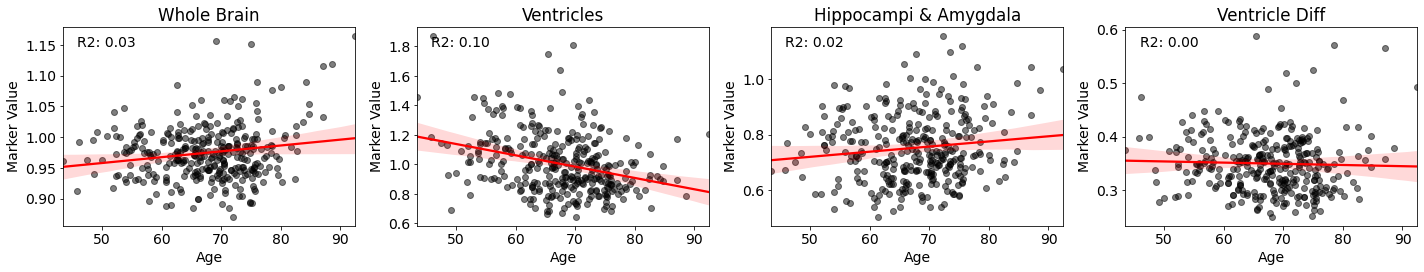

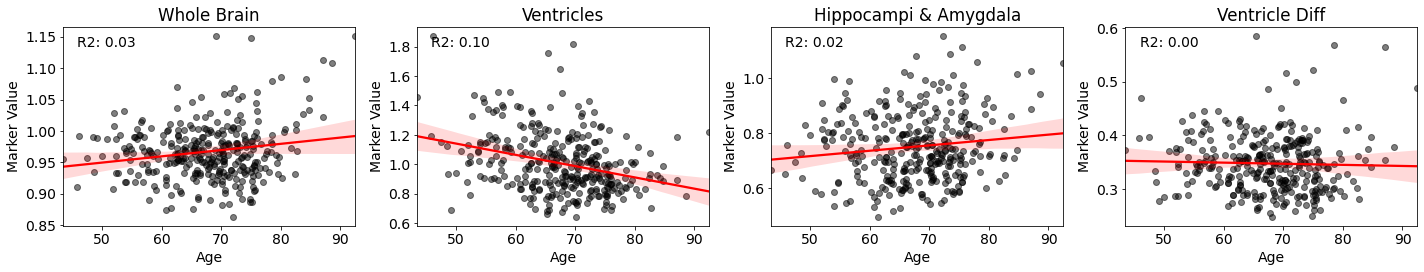

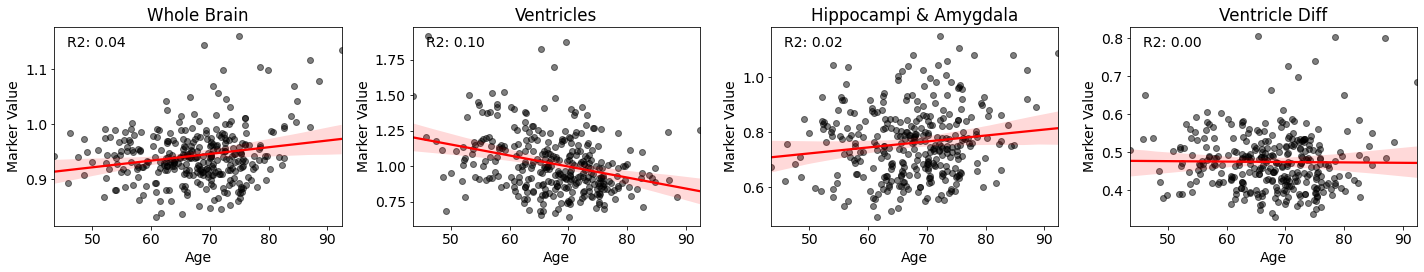

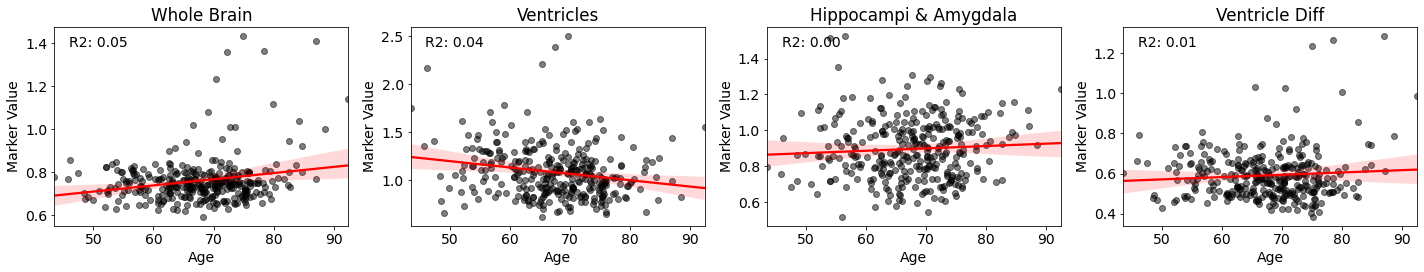

In [44]:
# 1.1 test biomarker-age relations on ad marker
def plot_1x4_fitted_line(df, th, save_name,  ci=80):
    plt.rcParams.update({'font.size': 14})
    df = df.drop(df[(df.disease_condition == 1)].index)
    
    df[f'wb_tad_{th}']= df[f'wb_tad_{th}'] * abs(df['subject_ages'] - 60)
    df[f'ven_tad_{th}']= df[f'ven_tad_{th}'] * abs(df['subject_ages'] - 60)
    df[f'hipp_tad_{th}']= df[f'hipp_tad_{th}'] * abs(df['subject_ages'] - 60)
    df[f'vendiff_tad_{th}']= df[f'vendiff_tad_{th}'] * abs(df['subject_ages'] - 60)
    
    # Define the line equation
    line_eq = lambda x: x - 60

    # Plot the data points and the linear line
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

    # Iterate over each subplot
    plot_titles = ["Whole Brain", "Ventricles", "Hippocampi & Amygdala", "Ventricle Diff"]
    for i, ax in enumerate(axs):
        # Get the column name based on the subplot index
        column_name = f'wb_tad_{th}' if i == 0 else f'ven_tad_{th}' if i == 1 else f'hipp_tad_{th}' if i == 2 else f'vendiff_tad_{th}'

        # Plot the data points and the linear line
        sns.regplot(x='subject_ages', y=column_name, data=df, ax=ax,
                    scatter_kws={"color": "black", "alpha": 0.5},
                    line_kws={"color": "red"},
                    ci=ci)

#         # Add the line with the equation y = x - 60
#         x_vals = np.array(ax.get_xlim())
#         ax.plot(x_vals, line_eq(x_vals), linestyle='dashed', color='blue')

        # Calculate R2 value
        x = df['subject_ages']
        y = df[column_name]
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        r_squared = r_value ** 2

        # Set the title and axis labels for the current subplot
        ax.set_title(plot_titles[i])
        ax.set_ylabel('Marker Value')
        ax.set_xlabel('Age')
#         ax.set_ylim([-40, 50])

        # Add the R2 value to the legend
        legend_text = f"R2: {r_squared:.2f}"
        
        # Add the R-squared value to the plot
        ax.text(0.25, 0.9, f"R2: {r_squared:.2f}", transform=ax.transAxes, ha='right')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show()

datasets = pd.read_csv(csv_path)
for th in ['0','0.5','0.8','0.99']:
    plot_1x4_fitted_line(datasets, th, f'HC_ad_marker_fittedline_at{th}',  ci=99)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

CN vs. AD: t-test independent samples, P_val:6.567e-60 t=-1.747e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 0.5: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=1.152e+00
0.5 vs. 1.0: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=-4.005e-01
1.0 vs. 2.0: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=6.830e-01
0.0 vs. 1.0: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=4.070e-01
0.5 vs. 2.0: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=6.474e-01
0.0 vs. 2.0: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=8.7

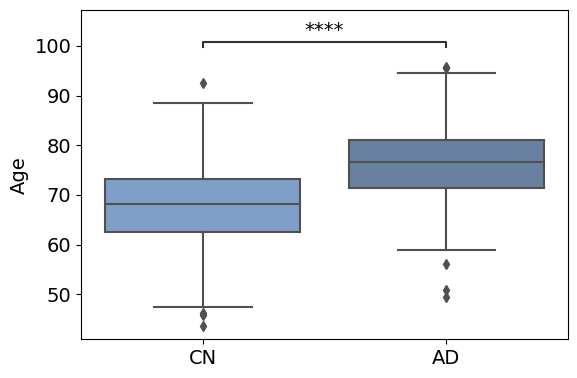

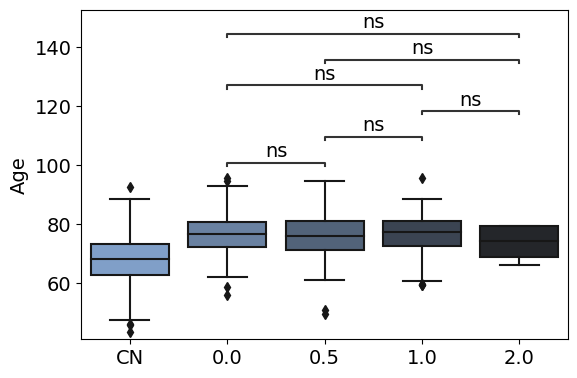

In [17]:
# 2. test age dist
def plot_age_dist_CN_vs_AD(df, save_name):
    from statannotations.Annotator import Annotator
    df['disease_categroy'] = df['disease_condition'].apply(lambda x: 'CN' if x == 0 else 'AD')    
    plt.rcParams.update({'font.size': 14})
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)
    
    # Decide which pairs of data to annotate
    plotting_parameters = {
    'data':    df,
    'x':       'disease_categroy',
    'y':       'subject_ages',
    'palette': subcat_palette[1:],
    'order':   ['CN', 'AD']
    }
    
    pairs = [('CN', 'AD')] 
 
    # Create new plot
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

    # Plot with seaborn
    sns.boxplot(**plotting_parameters)

    # Add annotations
    annotator = Annotator(axs, pairs, **plotting_parameters)
    annotator.configure(test='t-test_ind', verbose=True).apply_and_annotate()

    # Label and show
    axs.set_ylabel('Age')
    axs.set_xlabel('')
    
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show
    
def plot_age_dist_AD_CDR(df, save_name):
    import statsmodels
    from statannotations.Annotator import Annotator
    df['disease_categroy'] = np.where((df.disease_condition == 0), 'CN', df.scan_cdr)
    
    plt.rcParams.update({'font.size': 14})
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)
    
    # Decide which pairs of data to annotate
    plotting_parameters = {
    'data':    df,
    'x':       'disease_categroy',
    'y':       'subject_ages',
    'palette': subcat_palette[1:],
    'order':   ['CN', "0.0", "0.5", "1.0", "2.0"]
    }
    
    pairs = [('0.0', '0.5'),
             ('0.0', '1.0'),
             ('0.0', '2.0'),
             ('0.5', '1.0'),
             ('0.5', '2.0'),
             ('1.0', '2.0'),
            ] 
 
    # Create new plot
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

    # Plot with seaborn
    sns.boxplot(**plotting_parameters)

    # Add annotations
    annotator = Annotator(axs, pairs, **plotting_parameters)
    annotator.configure(test='t-test_ind', comparisons_correction="bonferroni", verbose=True).apply_and_annotate()

    # Label and show
    axs.set_ylabel('Age')
    axs.set_xlabel('')
    
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show  
    
datasets = pd.read_csv(csv_path)
plot_age_dist_CN_vs_AD(datasets, 'Age_distributions_CN_vs_AD')
plot_age_dist_AD_CDR(datasets, 'Age_distributions_CN_vs_ADcohorts')

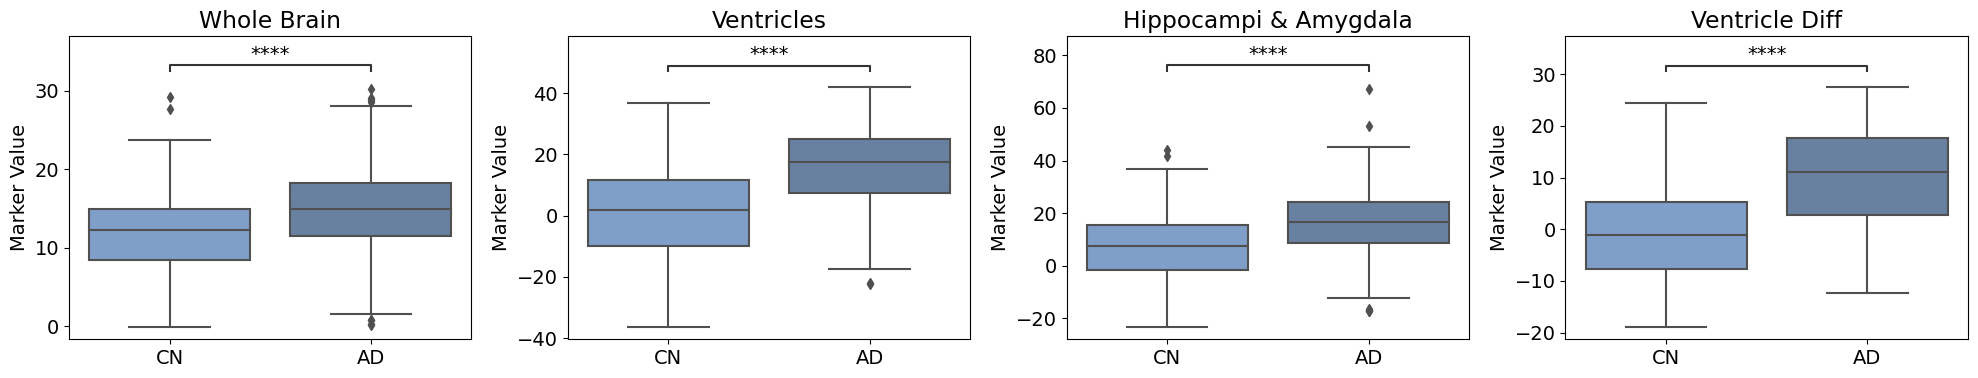

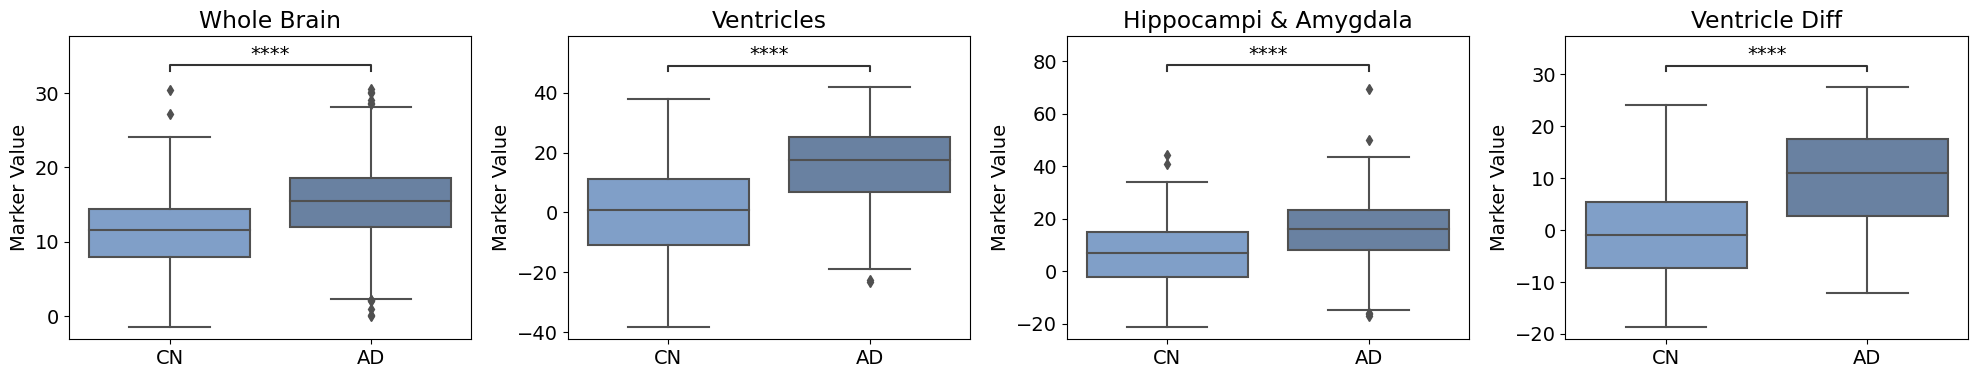

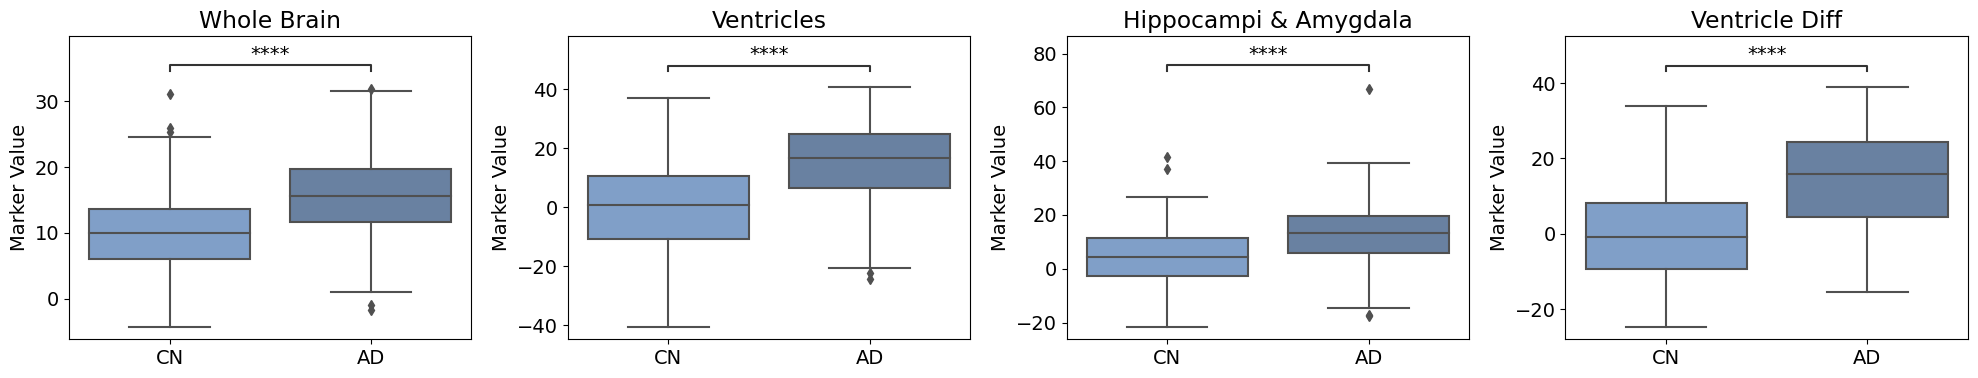

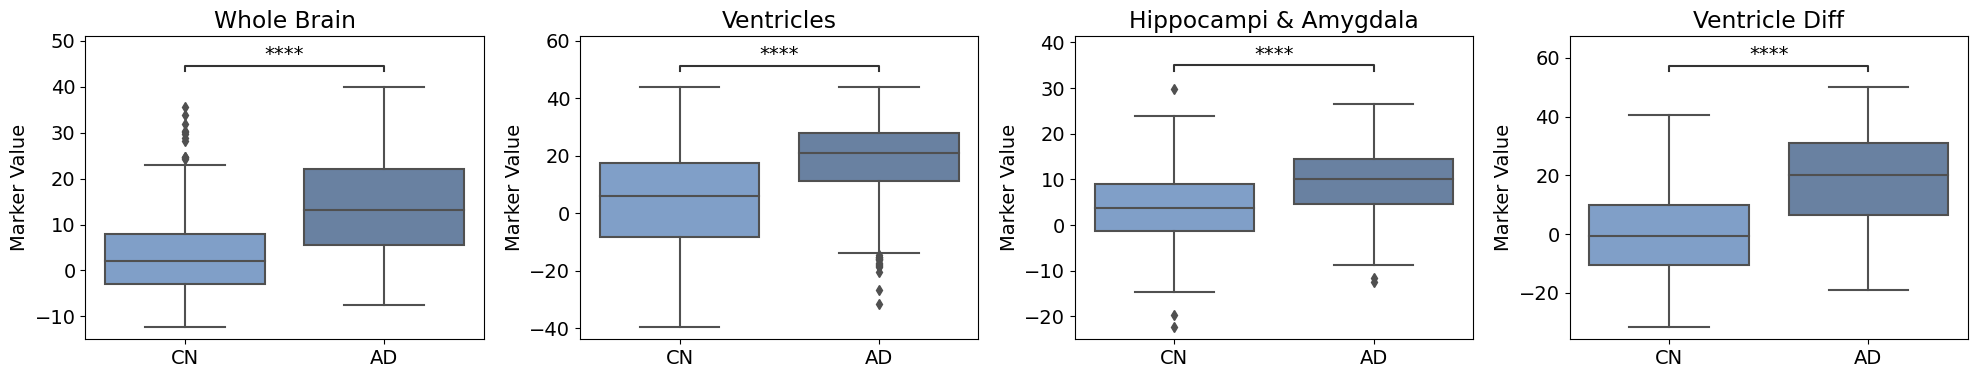

In [24]:
# 3.1. compare CN with AD using biomarker
def plot_1x4_CN_vs_AD(df, th, save_name):
    import statsmodels
    from statannotations.Annotator import Annotator
    df['disease_categroy'] = np.where((df.disease_condition == 0), 'CN', 'AD')
    
    plt.rcParams.update({'font.size': 14})
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)
    
    # Decide which pairs of data to annotate
    plotting_parameters = {
    'data':    df,
    'x':       'disease_categroy',
    'palette': subcat_palette[1:],
    'order':   ['CN', "AD"]
    }
    
    pairs = [('CN', 'AD')] 
 
    # Plot the data points and the linear line
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

    # Iterate over each subplot
    plot_titles = ["Whole Brain", "Ventricles", "Hippocampi & Amygdala", "Ventricle Diff"]
    for i, ax in enumerate(axs):
        # Get the column name based on the subplot index
        column_name = f'wb_thc_{th}' if i == 0 else f'ven_thc_{th}' if i == 1 else f'hipp_thc_{th}' if i == 2 else f'vendiff_thc_{th}'

        # Plot with seaborn
        sns.boxplot(y=column_name, **plotting_parameters, ax=ax)

        # Add annotations
        annotator = Annotator(ax, pairs, y=column_name, **plotting_parameters)
        annotator.configure(test='t-test_ind', comparisons_correction="bonferroni", verbose=False).apply_and_annotate()


        # Set the title and axis labels for the current subplot
        ax.set_title(plot_titles[i])
        ax.set_ylabel('Marker Value')
        ax.set_xlabel('')
        
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show()
    
datasets = pd.read_csv(csv_path)
for th in ['0','0.5','0.8','0.99']:
    plot_1x4_CN_vs_AD(datasets, th, f'CNAD_marker_at{th}')

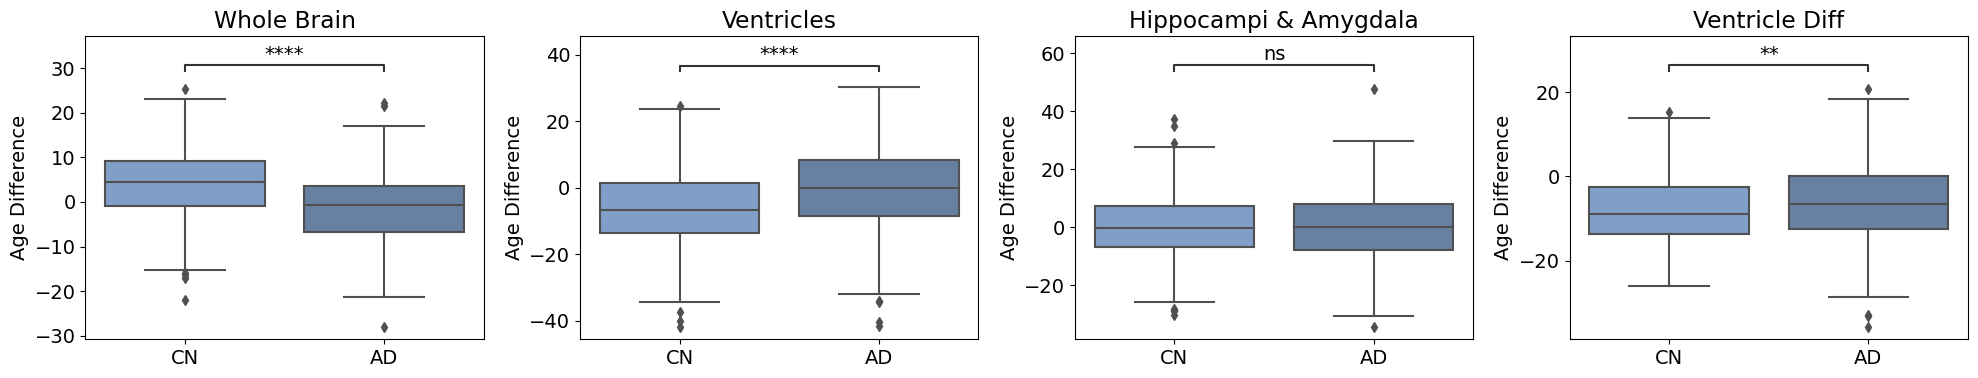

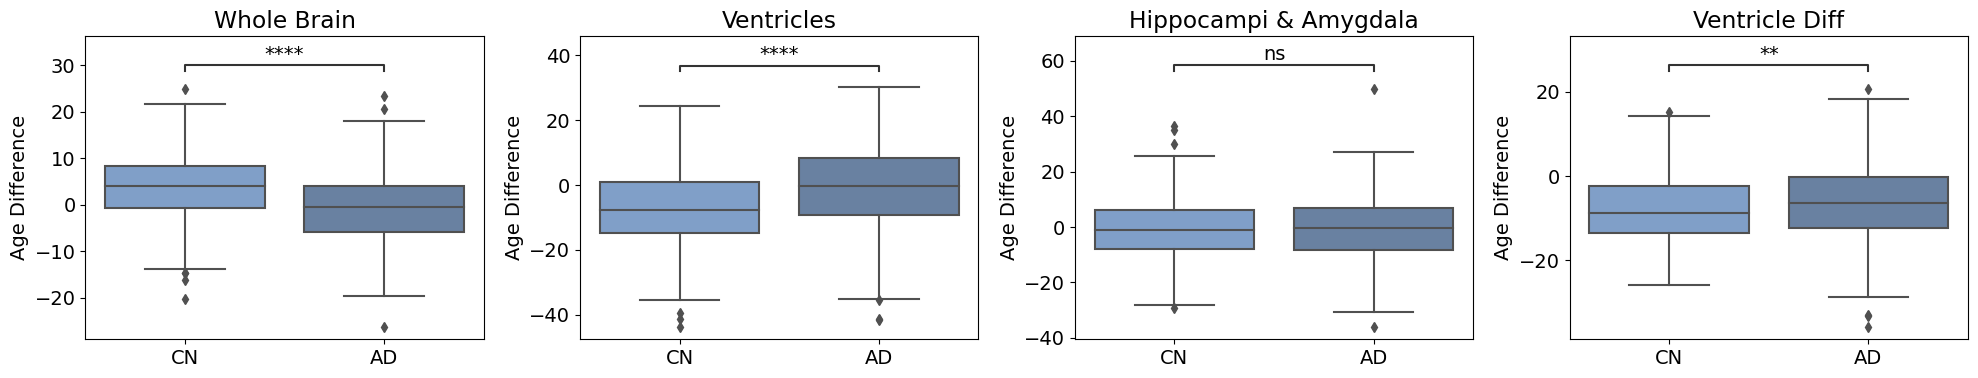

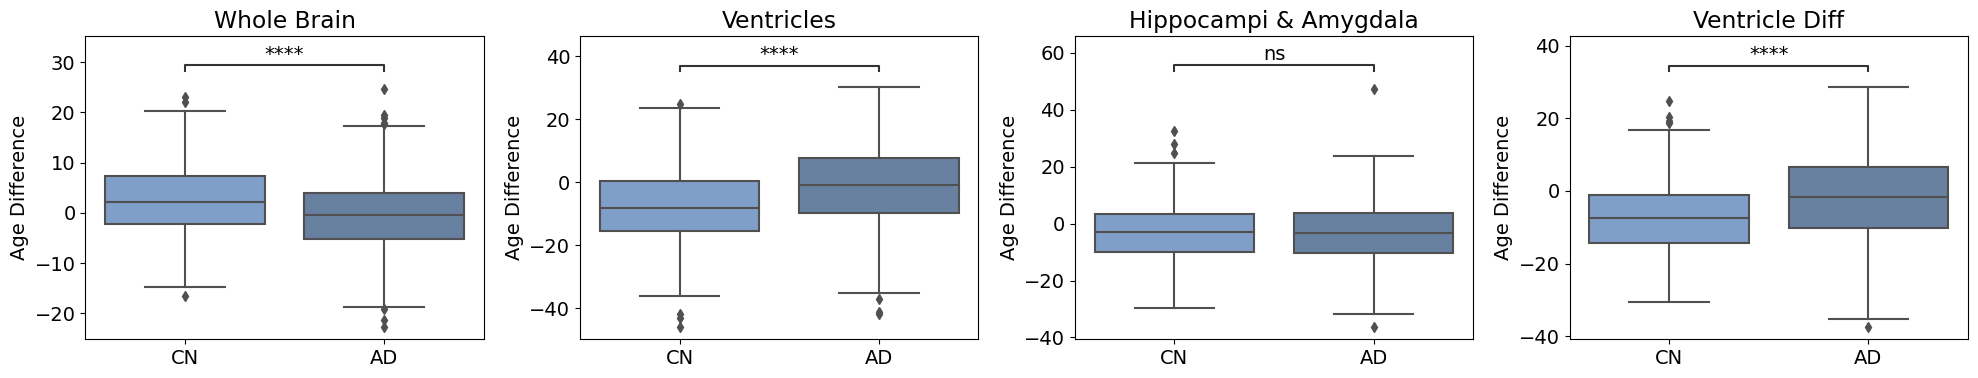

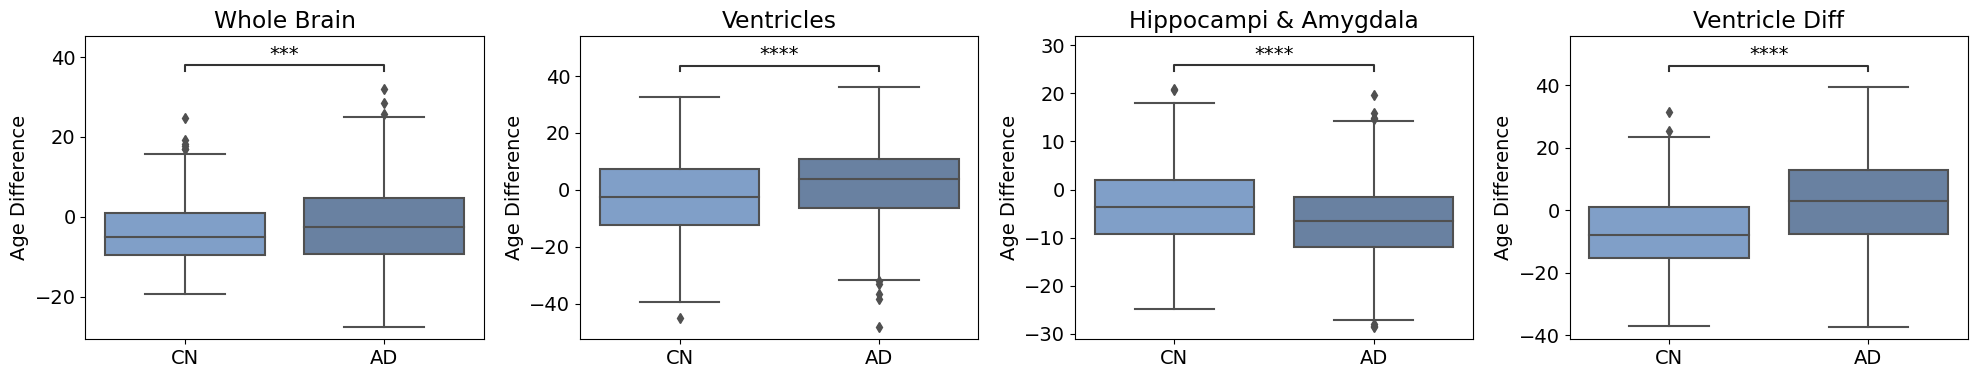

In [25]:
# 3.2. compare CN with AD using age diff 
def plot_1x4_CN_vs_AD_age_diff(df, th, save_name):
    import statsmodels
    from statannotations.Annotator import Annotator
    df['disease_categroy'] = np.where((df.disease_condition == 0), 'CN', 'AD')
    df[f'wb_thc_{th}_diff']= df[f'wb_thc_{th}'] - df['subject_ages'] + 60
    df[f'ven_thc_{th}_diff']= df[f'ven_thc_{th}'] - df['subject_ages'] + 60
    df[f'hipp_thc_{th}_diff']= df[f'hipp_thc_{th}'] - df['subject_ages'] + 60
    df[f'vendiff_thc_{th}_diff']= df[f'vendiff_thc_{th}'] - df['subject_ages'] + 60
    
    plt.rcParams.update({'font.size': 14})
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)
    
    # Decide which pairs of data to annotate
    plotting_parameters = {
    'data':    df,
    'x':       'disease_categroy',
    'palette': subcat_palette[1:],
    'order':   ['CN', "AD"]
    }
    
    pairs = [('CN', 'AD')] 
 
    # Plot the data points and the linear line
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

    # Iterate over each subplot
    plot_titles = ["Whole Brain", "Ventricles", "Hippocampi & Amygdala", "Ventricle Diff"]
    for i, ax in enumerate(axs):
        # Get the column name based on the subplot index
        column_name = f'wb_thc_{th}_diff' if i == 0 else f'ven_thc_{th}_diff' if i == 1 else f'hipp_thc_{th}_diff' if i == 2 else f'vendiff_thc_{th}_diff'

        # Plot with seaborn
        sns.boxplot(y=column_name, **plotting_parameters, ax=ax)

        # Add annotations
        annotator = Annotator(ax, pairs, y=column_name, **plotting_parameters)
        annotator.configure(test='t-test_ind', comparisons_correction="bonferroni", verbose=False).apply_and_annotate()


        # Set the title and axis labels for the current subplot
        ax.set_title(plot_titles[i])
        ax.set_ylabel('Age Difference')
        ax.set_xlabel('')
        
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show()
    
datasets = pd.read_csv(csv_path)
for th in ['0','0.5','0.8','0.99']:
    plot_1x4_CN_vs_AD_age_diff(datasets, th, f'CNAD_age_diff_at{th}')

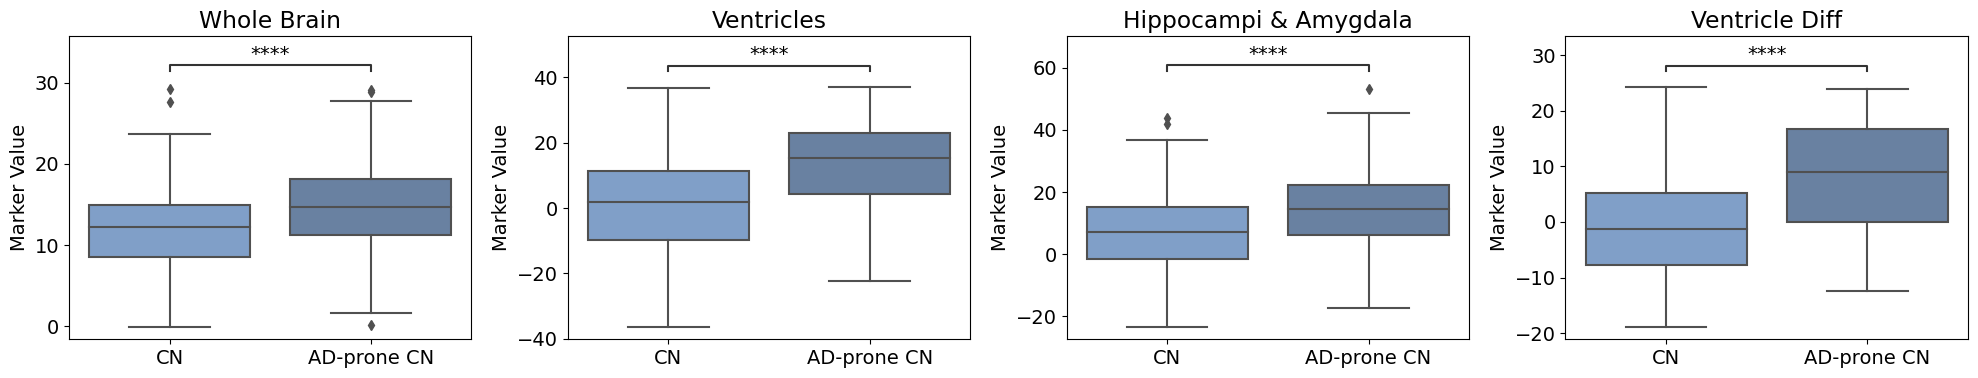

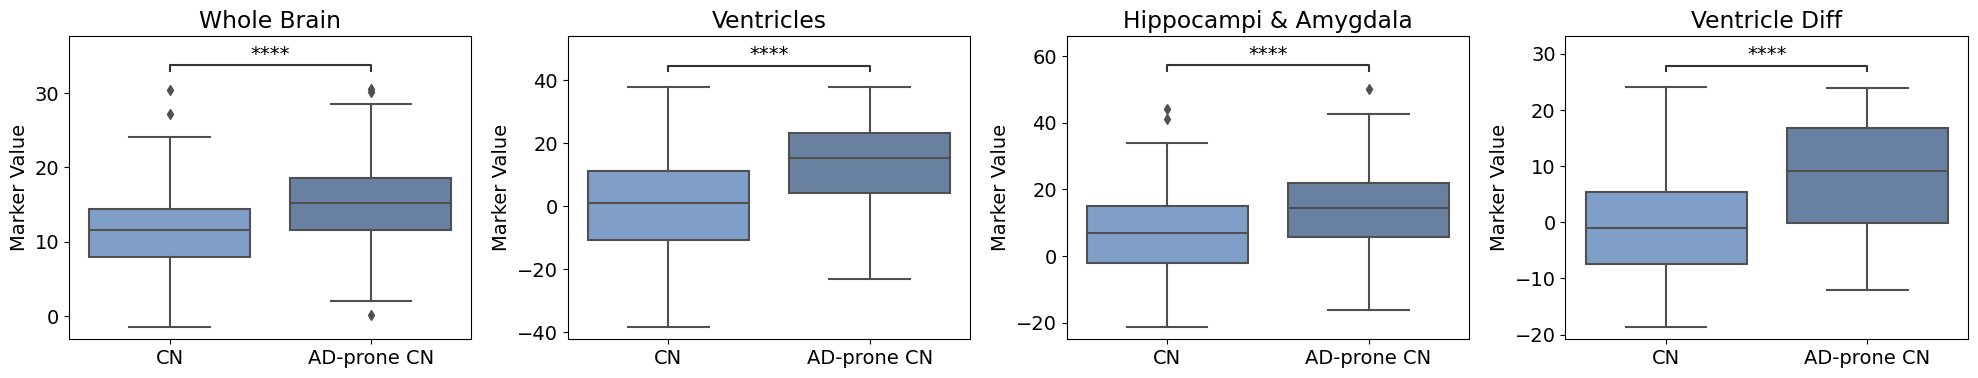

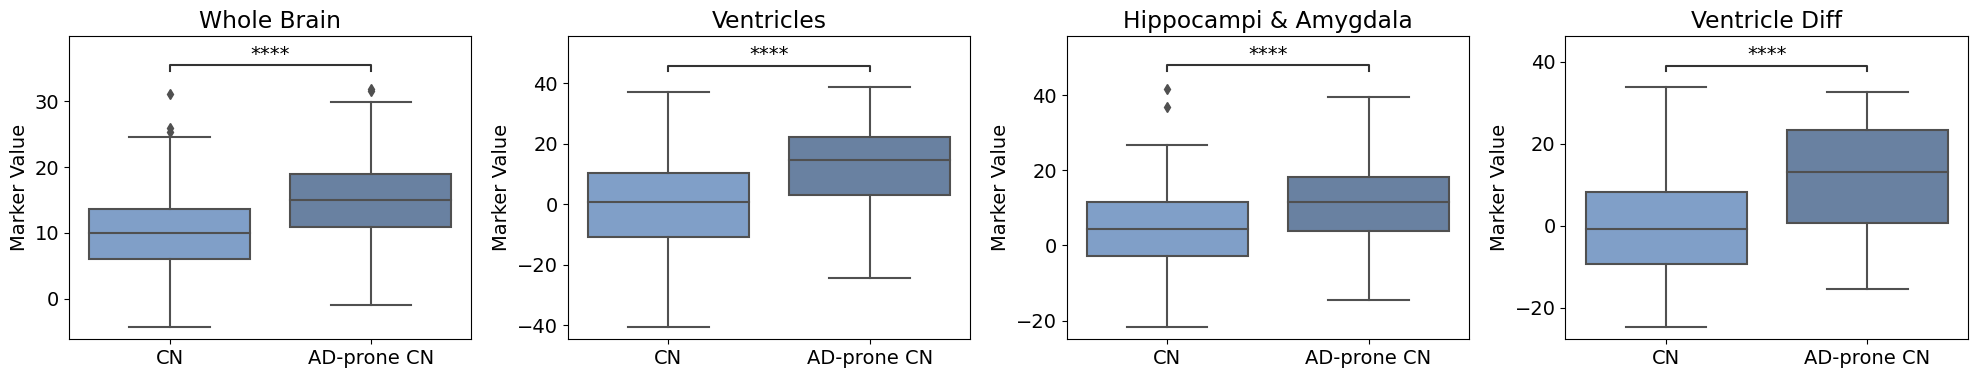

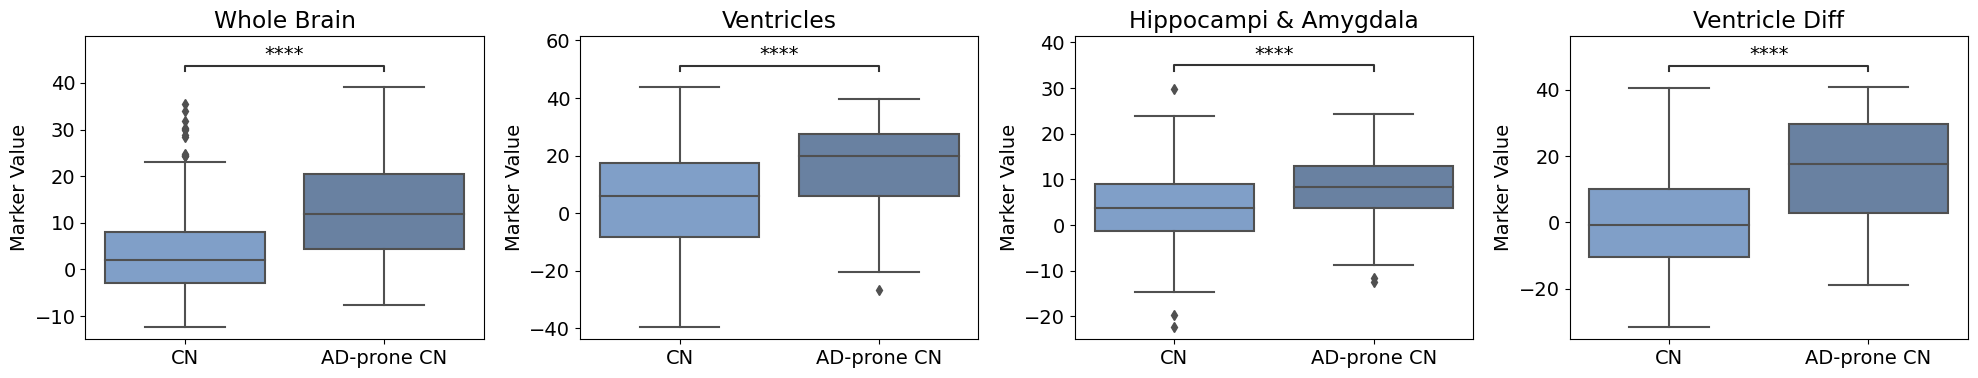

In [26]:
# 4.1. compare CN with AD-prone CN using biomarker
def plot_1x4_CN_vs_ADprone_CN(df, th, save_name):
    import statsmodels
    from statannotations.Annotator import Annotator
    
    df = df.drop(df[(df.disease_condition == 1) & (df.scan_cdr != 0)].index)
    df['disease_categroy'] = np.where((df.disease_condition == 0), 'CN', 'AD-prone CN')
    
    plt.rcParams.update({'font.size': 14})
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)
    
    # Decide which pairs of data to annotate
    plotting_parameters = {
    'data':    df,
    'x':       'disease_categroy',
    'palette': subcat_palette[1:],
    'order':   ['CN', "AD-prone CN"]
    }
    
    pairs = [('CN', 'AD-prone CN')] 
 
    # Plot the data points and the linear line
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

    # Iterate over each subplot
    plot_titles = ["Whole Brain", "Ventricles", "Hippocampi & Amygdala", "Ventricle Diff"]
    for i, ax in enumerate(axs):
        # Get the column name based on the subplot index
        column_name = f'wb_thc_{th}' if i == 0 else f'ven_thc_{th}' if i == 1 else f'hipp_thc_{th}' if i == 2 else f'vendiff_thc_{th}'

        # Plot with seaborn
        sns.boxplot(y=column_name, **plotting_parameters, ax=ax)

        # Add annotations
        annotator = Annotator(ax, pairs, y=column_name, **plotting_parameters)
        annotator.configure(test='t-test_ind', comparisons_correction="bonferroni", verbose=False).apply_and_annotate()


        # Set the title and axis labels for the current subplot
        ax.set_title(plot_titles[i])
        ax.set_ylabel('Marker Value')
        ax.set_xlabel('')
        
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show()
    
datasets = pd.read_csv(csv_path)
for th in ['0','0.5','0.8','0.99']:
    plot_1x4_CN_vs_ADprone_CN(datasets, th, f'CN_ADproneCN__marker_at{th}')

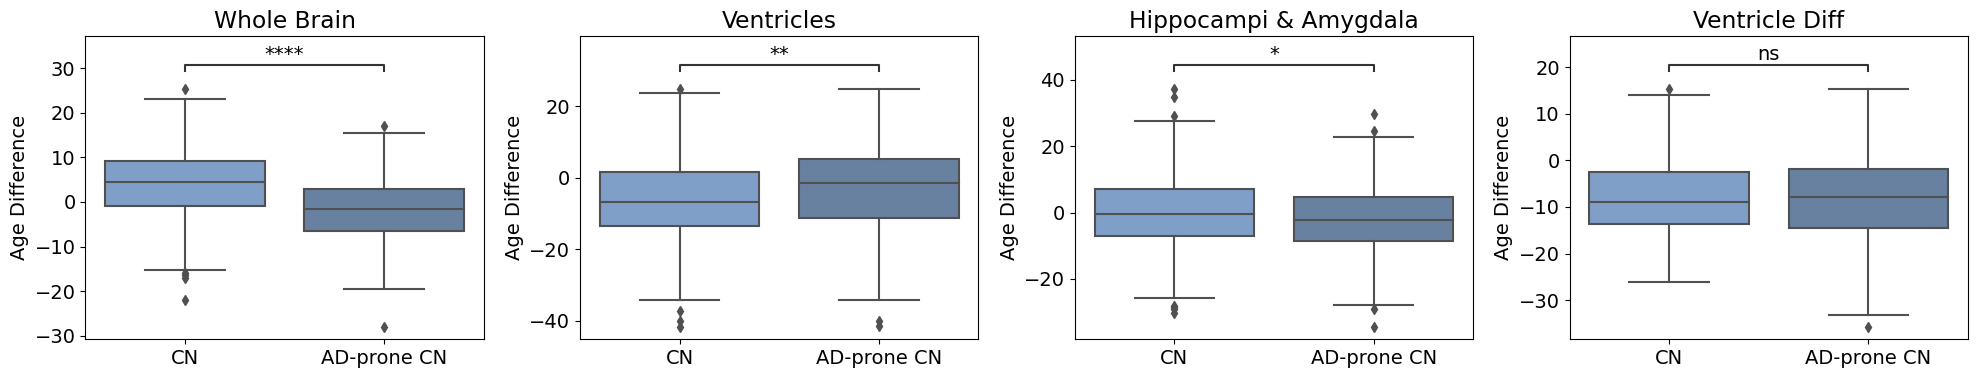

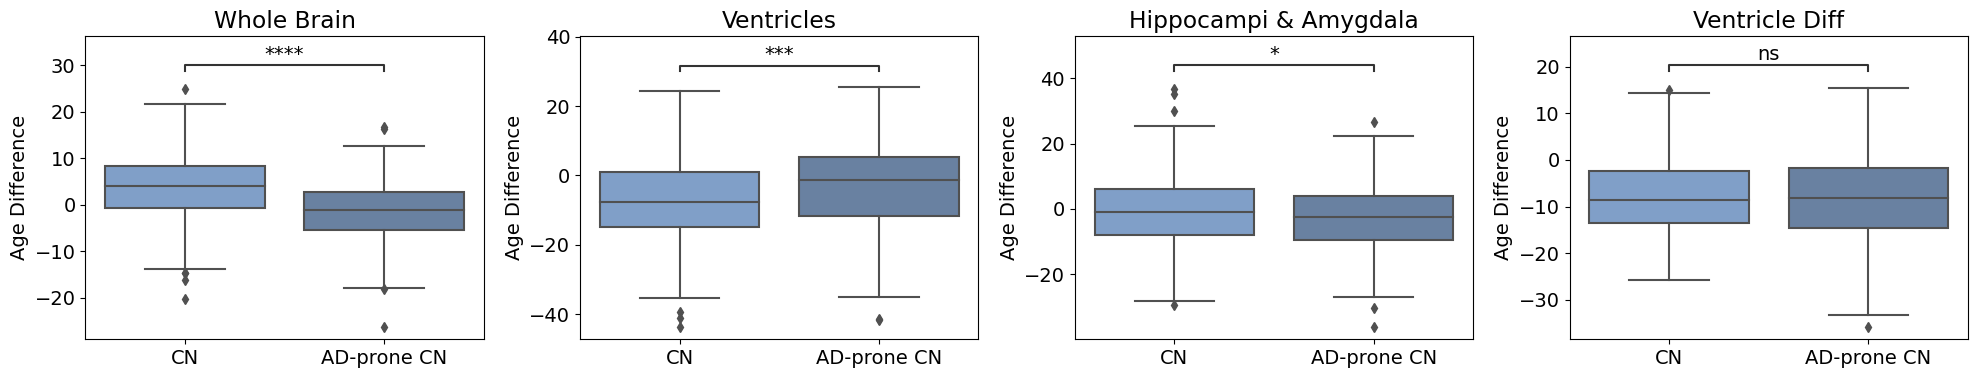

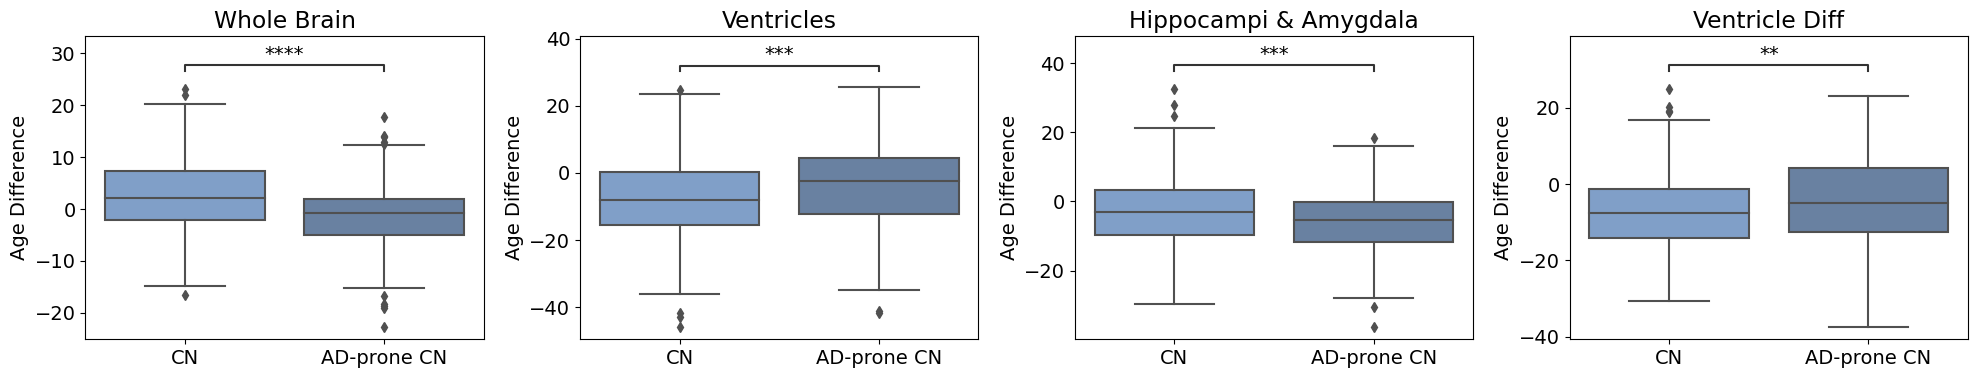

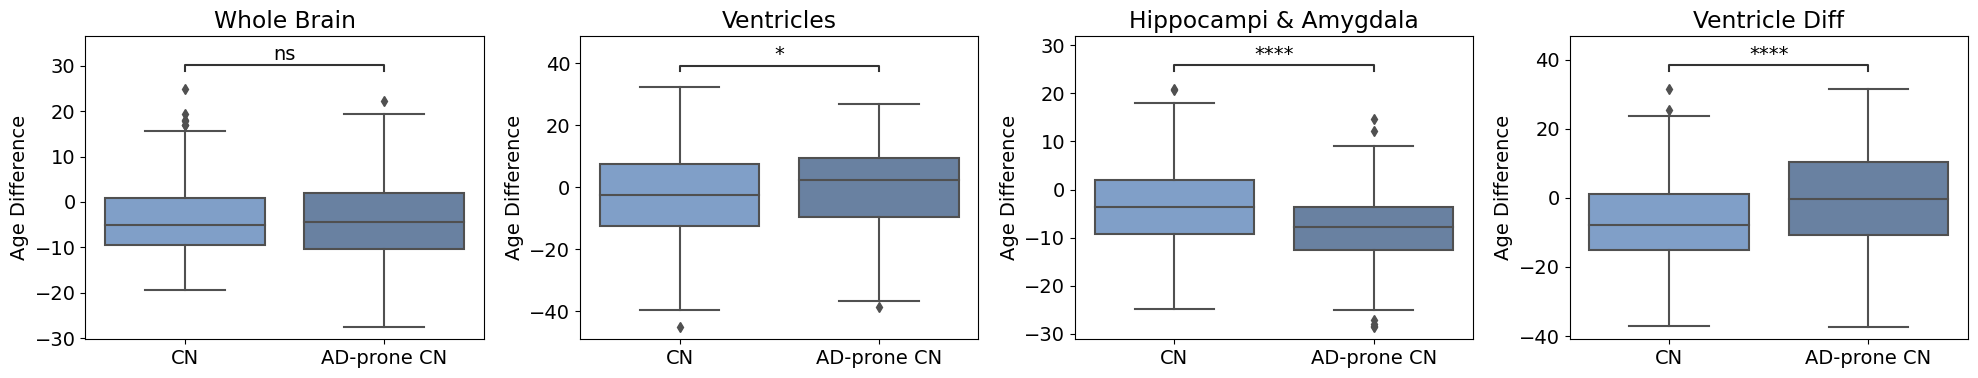

In [28]:
# 4.2. compare CN with with AD-prone CN using age diff 
def plot_1x4_CN_vs_AD_age_diff(df, th, save_name):
    import statsmodels
    from statannotations.Annotator import Annotator
    df = df.drop(df[(df.disease_condition == 1) & (df.scan_cdr != 0)].index)
    df['disease_categroy'] = np.where((df.disease_condition == 0), 'CN', 'AD-prone CN')
    df[f'wb_thc_{th}_diff']= df[f'wb_thc_{th}'] - df['subject_ages'] + 60
    df[f'ven_thc_{th}_diff']= df[f'ven_thc_{th}'] - df['subject_ages'] + 60
    df[f'hipp_thc_{th}_diff']= df[f'hipp_thc_{th}'] - df['subject_ages'] + 60
    df[f'vendiff_thc_{th}_diff']= df[f'vendiff_thc_{th}'] - df['subject_ages'] + 60
    
    plt.rcParams.update({'font.size': 14})
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)
    
    # Decide which pairs of data to annotate
    plotting_parameters = {
    'data':    df,
    'x':       'disease_categroy',
    'palette': subcat_palette[1:],
    'order':   ['CN', "AD-prone CN"]
    }
    
    pairs = [('CN', 'AD-prone CN')] 
 
    # Plot the data points and the linear line
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

    # Iterate over each subplot
    plot_titles = ["Whole Brain", "Ventricles", "Hippocampi & Amygdala", "Ventricle Diff"]
    for i, ax in enumerate(axs):
        # Get the column name based on the subplot index
        column_name = f'wb_thc_{th}_diff' if i == 0 else f'ven_thc_{th}_diff' if i == 1 else f'hipp_thc_{th}_diff' if i == 2 else f'vendiff_thc_{th}_diff'

        # Plot with seaborn
        sns.boxplot(y=column_name, **plotting_parameters, ax=ax)

        # Add annotations
        annotator = Annotator(ax, pairs, y=column_name, **plotting_parameters)
        annotator.configure(test='t-test_ind', comparisons_correction="bonferroni", verbose=False).apply_and_annotate()


        # Set the title and axis labels for the current subplot
        ax.set_title(plot_titles[i])
        ax.set_ylabel('Age Difference')
        ax.set_xlabel('')
        
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show()
    
datasets = pd.read_csv(csv_path)
for th in ['0','0.5','0.8','0.99']:
    plot_1x4_CN_vs_AD_age_diff(datasets, th, f'CN_ADproneCN__age_diff_at{th}')

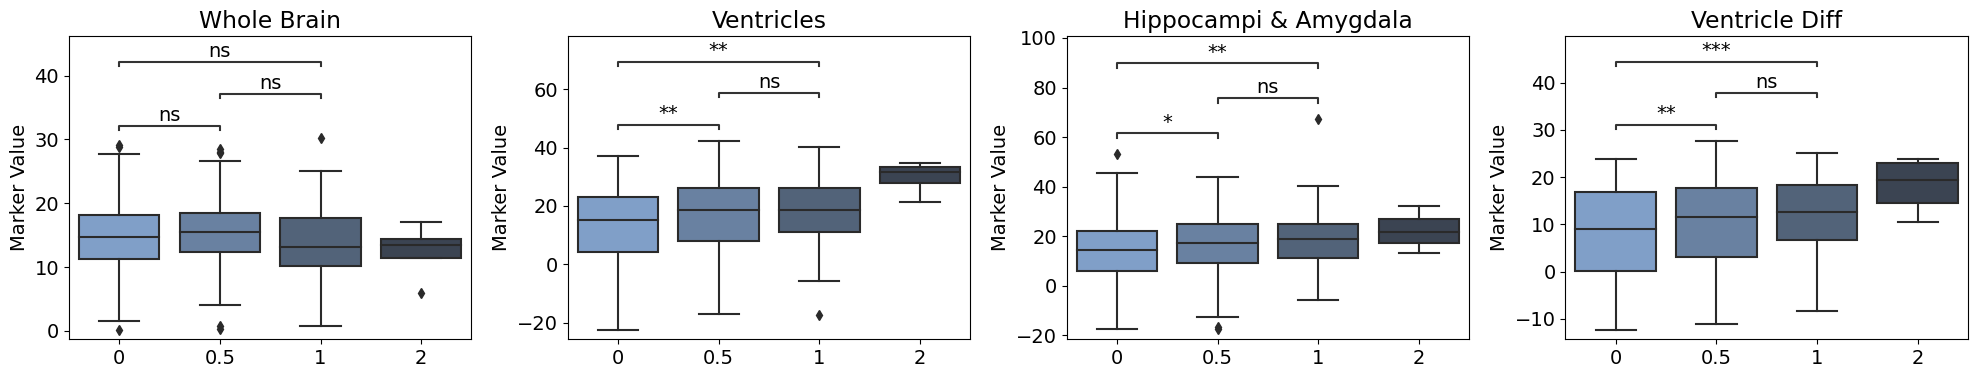

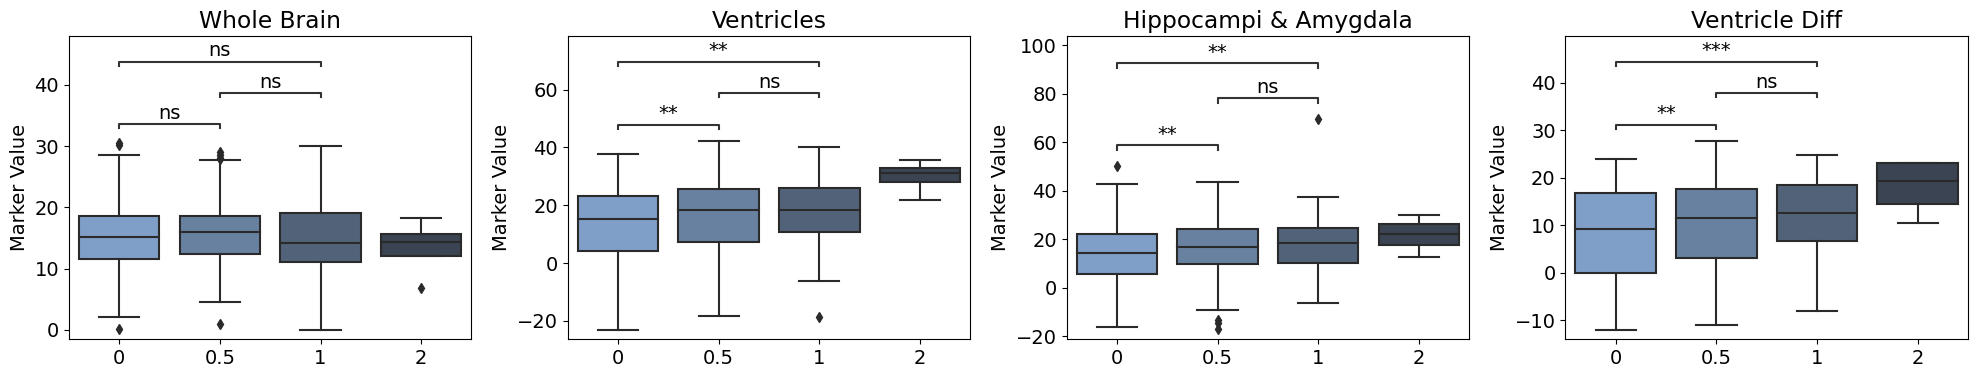

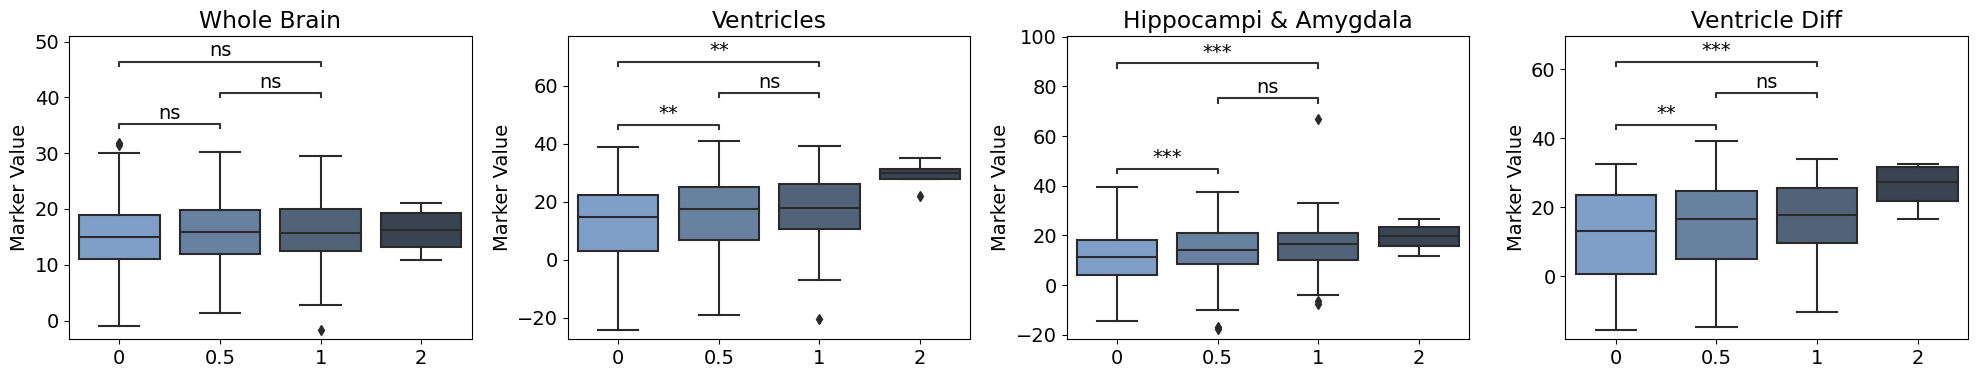

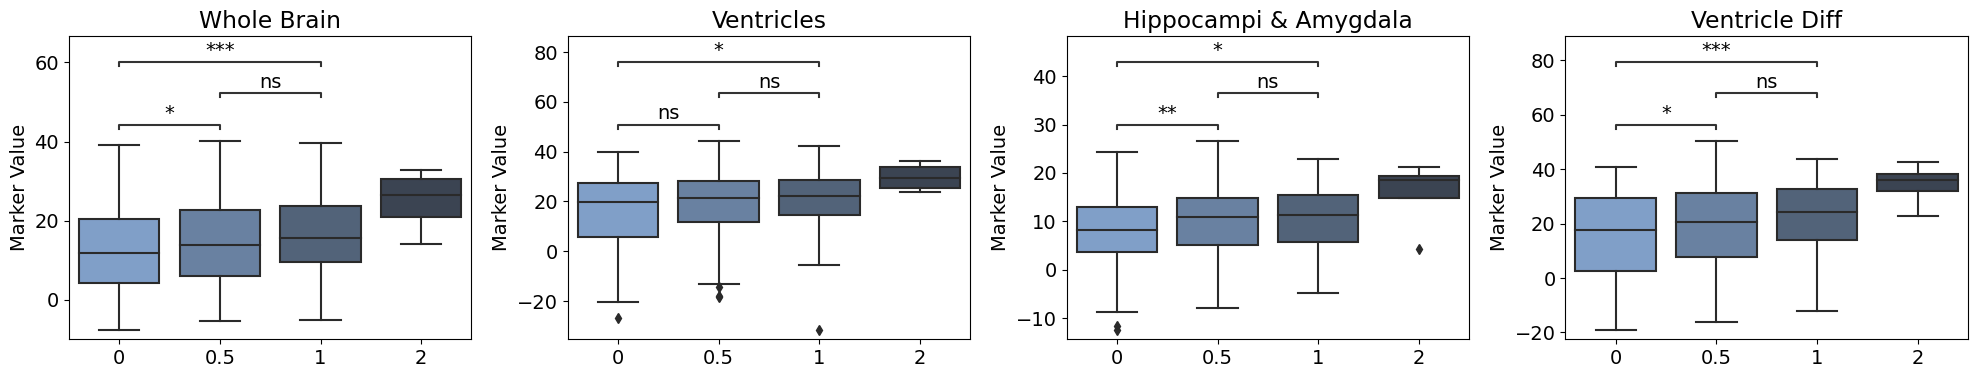

In [37]:
# 5. compare AD stages according to CDR using biomarker
def plot_age_dist_AD_CDR(df, th, save_name):
    import statsmodels
    from statannotations.Annotator import Annotator

    plt.rcParams.update({'font.size': 14})
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)
    
#     df['disease_categroy'] = np.where((df.disease_condition == 0), 'CN', df.scan_cdr)
#     # Decide which pairs of data to annotate
#     plotting_parameters = {
#     'data':    df,
#     'x':       'disease_categroy',
#     'palette': subcat_palette[1:],
#     'order':   ['CN', "0.0", "0.5", "1.0", "2.0"]
#     }
    
#     pairs = [('0.0', '0.5'),
#              ('0.0', '1.0'),
#              ('0.5', '1.0'),
#             ] 

    df = df.drop(df[df.disease_condition == 0].index)
    
    # Decide which pairs of data to annotate
    plotting_parameters = {
    'data':    df,
    'x':       'scan_cdr',
    'palette': subcat_palette[1:],
    'order':   [0, 0.5, 1, 2]
    }
    
    pairs = [(0, 0.5),
             (0, 1),
             (0.5, 1),
            ] 

    # Plot the data points and the linear line
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

    # Iterate over each subplot
    plot_titles = ["Whole Brain", "Ventricles", "Hippocampi & Amygdala", "Ventricle Diff"]
    for i, ax in enumerate(axs):
        # Get the column name based on the subplot index
        column_name = f'wb_thc_{th}' if i == 0 else f'ven_thc_{th}' if i == 1 else f'hipp_thc_{th}' if i == 2 else f'vendiff_thc_{th}'

        # Plot with seaborn
        sns.boxplot(y=column_name, **plotting_parameters, ax=ax)

        # Add annotations
        annotator = Annotator(ax, pairs, y=column_name, **plotting_parameters)
        annotator.configure(test='t-test_ind', comparisons_correction="bonferroni", verbose=False).apply_and_annotate()


        # Set the title and axis labels for the current subplot
        ax.set_title(plot_titles[i])
        ax.set_ylabel('Marker Value')
        ax.set_xlabel('')
        
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show()
    
datasets = pd.read_csv(csv_path)
for th in ['0','0.5','0.8','0.99']:
    plot_age_dist_AD_CDR(datasets, th, f'AD_markers_at{th}')

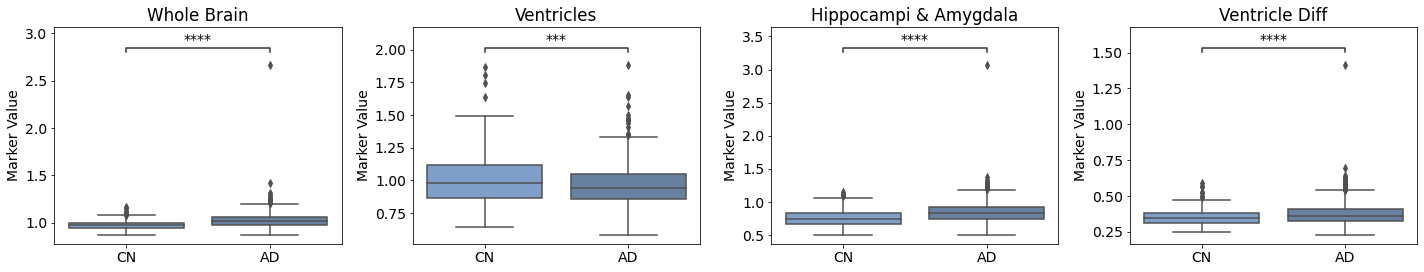

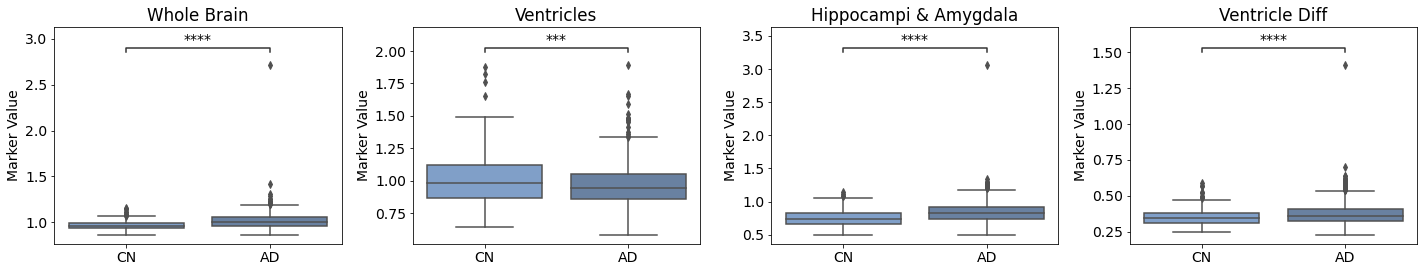

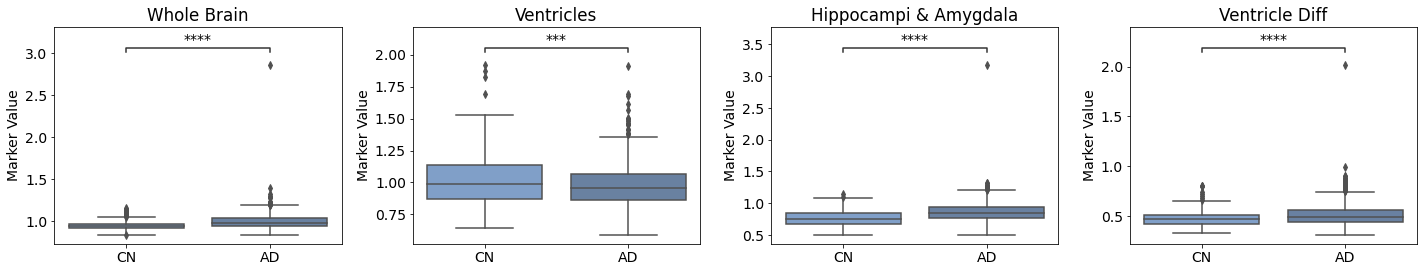

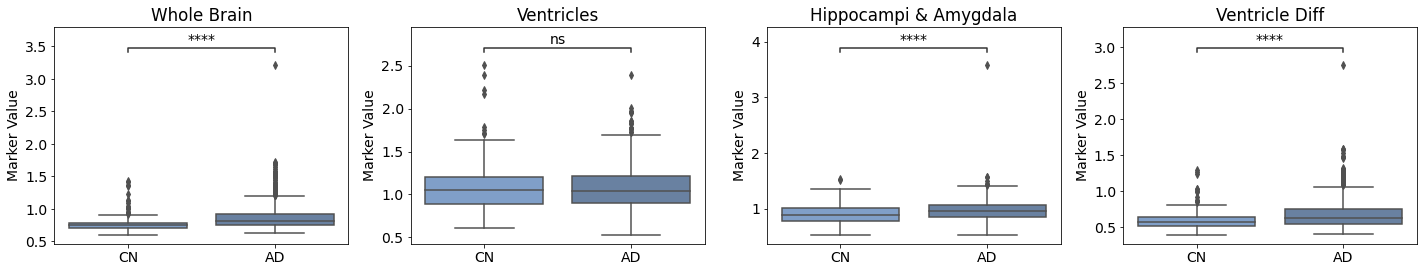

In [15]:
# 3.3. compare CN with AD using biomarker on ad
def plot_1x4_CN_vs_AD(df, th, save_name):
    import statsmodels
    from statannotations.Annotator import Annotator
    df[f'wb_tad_{th}']= df[f'wb_tad_{th}'] * abs(df['subject_ages'] - 60)
    df[f'ven_tad_{th}']= df[f'ven_tad_{th}'] * abs(df['subject_ages'] - 60)
    df[f'hipp_tad_{th}']= df[f'hipp_tad_{th}'] * abs(df['subject_ages'] - 60)
    df[f'vendiff_tad_{th}']= df[f'vendiff_tad_{th}'] * abs(df['subject_ages'] - 60)
    
    df['disease_categroy'] = np.where((df.disease_condition == 0), 'CN', 'AD')
    
    plt.rcParams.update({'font.size': 14})
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)
    
    # Decide which pairs of data to annotate
    plotting_parameters = {
    'data':    df,
    'x':       'disease_categroy',
    'palette': subcat_palette[1:],
    'order':   ['CN', "AD"]
    }
    
    pairs = [('CN', 'AD')] 
 
    # Plot the data points and the linear line
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

    # Iterate over each subplot
    plot_titles = ["Whole Brain", "Ventricles", "Hippocampi & Amygdala", "Ventricle Diff"]
    for i, ax in enumerate(axs):
        # Get the column name based on the subplot index
        column_name = f'wb_tad_{th}' if i == 0 else f'ven_tad_{th}' if i == 1 else f'hipp_tad_{th}' if i == 2 else f'vendiff_tad_{th}'

        # Plot with seaborn
        sns.boxplot(y=column_name, **plotting_parameters, ax=ax)

        # Add annotations
        annotator = Annotator(ax, pairs, y=column_name, **plotting_parameters)
        annotator.configure(test='t-test_ind', comparisons_correction="bonferroni", verbose=False).apply_and_annotate()


        # Set the title and axis labels for the current subplot
        ax.set_title(plot_titles[i])
        ax.set_ylabel('Marker Value')
        ax.set_xlabel('')
        
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show()
    
datasets = pd.read_csv(csv_path)
for th in ['0','0.5','0.8','0.99']:
    plot_1x4_CN_vs_AD(datasets, th, f'CNAD_ad_marker_at{th}')

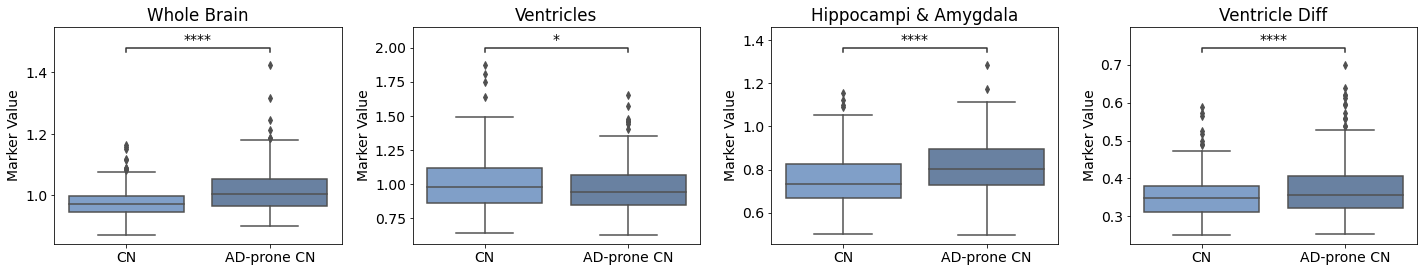

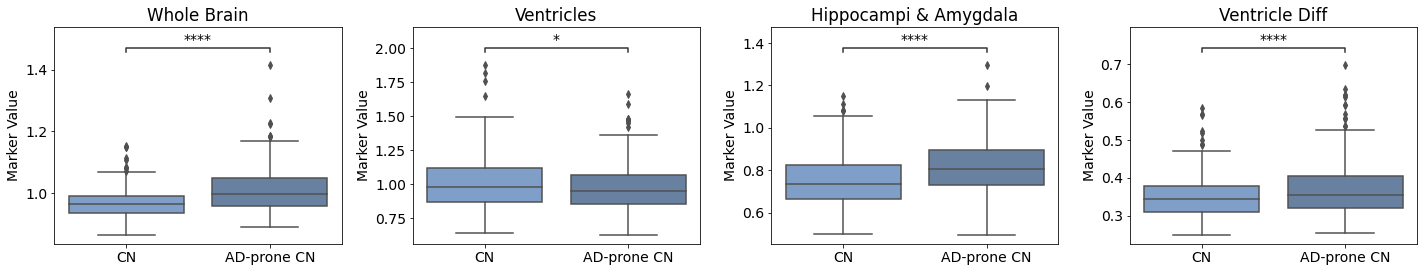

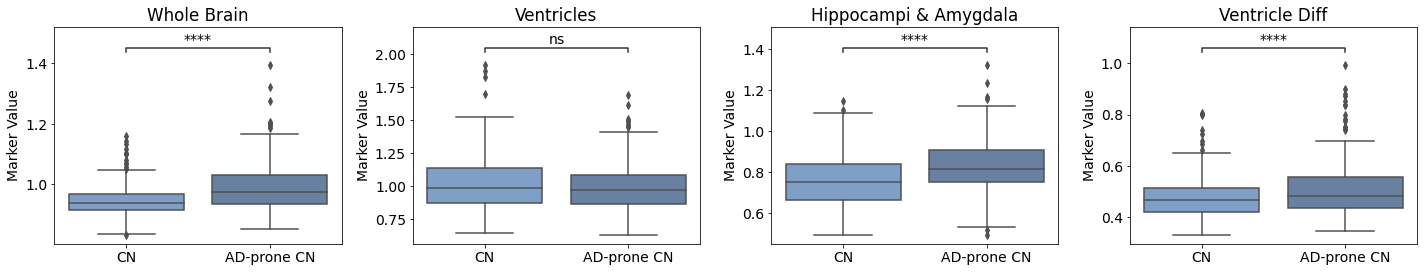

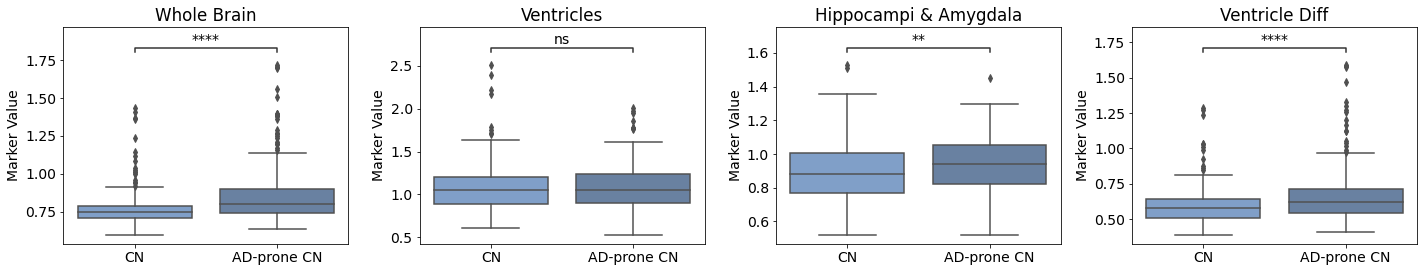

In [18]:
# 4.3. compare CN with AD-prone CN using ad biomarker
def plot_1x4_CN_vs_ADprone_CN(df, th, save_name):
    import statsmodels
    from statannotations.Annotator import Annotator
    df[f'wb_tad_{th}']= df[f'wb_tad_{th}'] * abs(df['subject_ages'] - 60)
    df[f'ven_tad_{th}']= df[f'ven_tad_{th}'] * abs(df['subject_ages'] - 60)
    df[f'hipp_tad_{th}']= df[f'hipp_tad_{th}'] * abs(df['subject_ages'] - 60)
    df[f'vendiff_tad_{th}']= df[f'vendiff_tad_{th}'] * abs(df['subject_ages'] - 60)
    
    df = df.drop(df[(df.disease_condition == 1) & (df.scan_cdr != 0)].index)
    df['disease_categroy'] = np.where((df.disease_condition == 0), 'CN', 'AD-prone CN')
    
    plt.rcParams.update({'font.size': 14})
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)
    
    # Decide which pairs of data to annotate
    plotting_parameters = {
    'data':    df,
    'x':       'disease_categroy',
    'palette': subcat_palette[1:],
    'order':   ['CN', "AD-prone CN"]
    }
    
    pairs = [('CN', 'AD-prone CN')] 
 
    # Plot the data points and the linear line
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

    # Iterate over each subplot
    plot_titles = ["Whole Brain", "Ventricles", "Hippocampi & Amygdala", "Ventricle Diff"]
    for i, ax in enumerate(axs):
        # Get the column name based on the subplot index
        column_name = f'wb_tad_{th}' if i == 0 else f'ven_tad_{th}' if i == 1 else f'hipp_tad_{th}' if i == 2 else f'vendiff_tad_{th}'

        # Plot with seaborn
        sns.boxplot(y=column_name, **plotting_parameters, ax=ax)

        # Add annotations
        annotator = Annotator(ax, pairs, y=column_name, **plotting_parameters)
        annotator.configure(test='t-test_ind', comparisons_correction="bonferroni", verbose=False).apply_and_annotate()


        # Set the title and axis labels for the current subplot
        ax.set_title(plot_titles[i])
        ax.set_ylabel('Marker Value')
        ax.set_xlabel('')
        
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show()
    
datasets = pd.read_csv(csv_path)
for th in ['0','0.5','0.8','0.99']:
    plot_1x4_CN_vs_ADprone_CN(datasets, th, f'CN_ADproneCN__marker_at{th}')

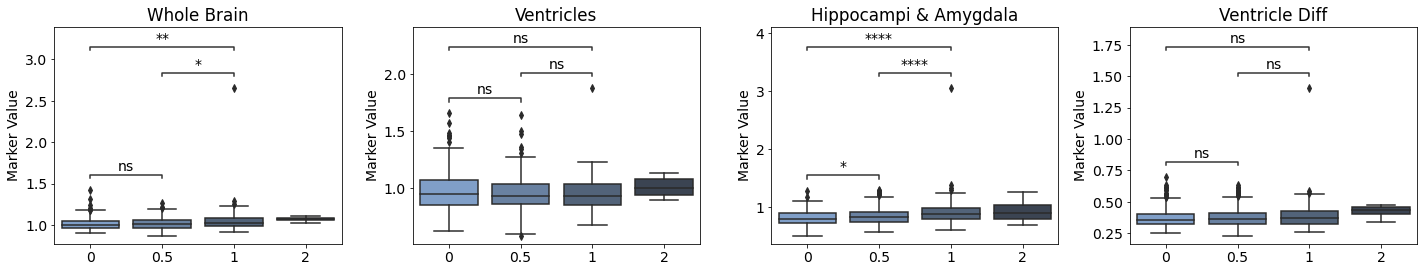

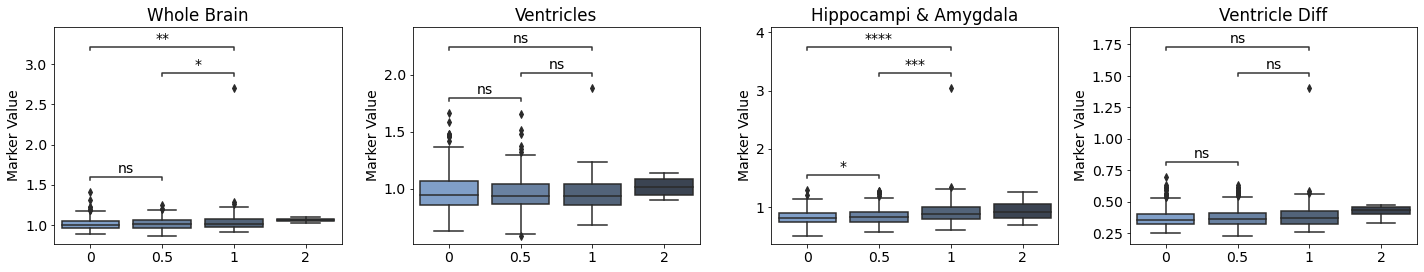

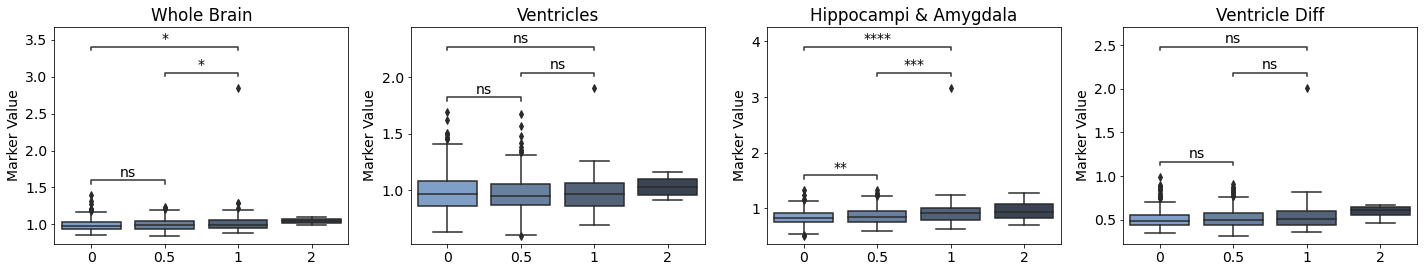

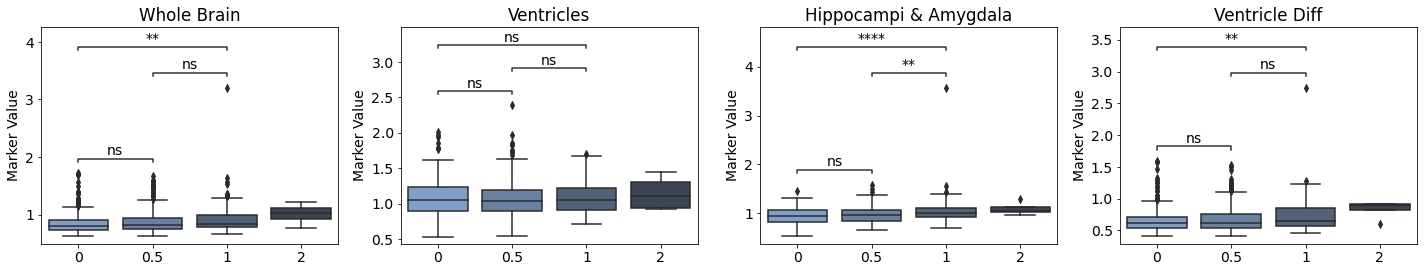

In [19]:
# 5. compare AD stages according to CDR using biomarker
def plot_age_dist_AD_CDR(df, th, save_name):
    import statsmodels
    from statannotations.Annotator import Annotator
    df[f'wb_tad_{th}']= df[f'wb_tad_{th}'] * abs(df['subject_ages'] - 60)
    df[f'ven_tad_{th}']= df[f'ven_tad_{th}'] * abs(df['subject_ages'] - 60)
    df[f'hipp_tad_{th}']= df[f'hipp_tad_{th}'] * abs(df['subject_ages'] - 60)
    df[f'vendiff_tad_{th}']= df[f'vendiff_tad_{th}'] * abs(df['subject_ages'] - 60)
    
    plt.rcParams.update({'font.size': 14})
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)
    
#     df['disease_categroy'] = np.where((df.disease_condition == 0), 'CN', df.scan_cdr)
#     # Decide which pairs of data to annotate
#     plotting_parameters = {
#     'data':    df,
#     'x':       'disease_categroy',
#     'palette': subcat_palette[1:],
#     'order':   ['CN', "0.0", "0.5", "1.0", "2.0"]
#     }
    
#     pairs = [('0.0', '0.5'),
#              ('0.0', '1.0'),
#              ('0.5', '1.0'),
#             ] 

    df = df.drop(df[df.disease_condition == 0].index)
    
    # Decide which pairs of data to annotate
    plotting_parameters = {
    'data':    df,
    'x':       'scan_cdr',
    'palette': subcat_palette[1:],
    'order':   [0, 0.5, 1, 2]
    }
    
    pairs = [(0, 0.5),
             (0, 1),
             (0.5, 1),
            ] 

    # Plot the data points and the linear line
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

    # Iterate over each subplot
    plot_titles = ["Whole Brain", "Ventricles", "Hippocampi & Amygdala", "Ventricle Diff"]
    for i, ax in enumerate(axs):
        # Get the column name based on the subplot index
        column_name = f'wb_tad_{th}' if i == 0 else f'ven_tad_{th}' if i == 1 else f'hipp_tad_{th}' if i == 2 else f'vendiff_tad_{th}'

        # Plot with seaborn
        sns.boxplot(y=column_name, **plotting_parameters, ax=ax)

        # Add annotations
        annotator = Annotator(ax, pairs, y=column_name, **plotting_parameters)
        annotator.configure(test='t-test_ind', comparisons_correction="bonferroni", verbose=False).apply_and_annotate()


        # Set the title and axis labels for the current subplot
        ax.set_title(plot_titles[i])
        ax.set_ylabel('Marker Value')
        ax.set_xlabel('')
        
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show()
    
datasets = pd.read_csv(csv_path)
for th in ['0','0.5','0.8','0.99']:
    plot_age_dist_AD_CDR(datasets, th, f'AD_markers_at{th}')

In [2]:
# paths
csv_path = './outputs/Vel30_invert_AllTest_11interval_results_1014.csv'

In [3]:
datasets = pd.read_csv(csv_path)
datasets.head()

,subject_ids,subject_ages,disease_condition,scan_cdr,ven_thc_0.0,ven_thc_0.1,ven_thc_0.2,ven_thc_0.30000000000000004,ven_thc_0.4,ven_thc_0.5,...,hippdiff_maskNum_0.2,hippdiff_maskNum_0.30000000000000004,hippdiff_maskNum_0.4,hippdiff_maskNum_0.5,hippdiff_maskNum_0.6000000000000001,hippdiff_maskNum_0.7000000000000001,hippdiff_maskNum_0.8,hippdiff_maskNum_0.9,hippdiff_maskNum_0.99,subject_rounded_ages
0,OAS30004,58.150638,0,0.0,-22.399691,-23.313814,-23.437541,-23.393857,-23.526042,-23.649978,...,10189.0,10184.0,9671.0,9407.0,7861.0,6815.0,4997.0,3678.0,527.0,58.151
1,OAS30005,54.594507,0,0.0,-14.107790,-15.512603,-15.368860,-15.487604,-15.496821,-15.937139,...,10189.0,10184.0,9671.0,9407.0,7861.0,6815.0,4997.0,3678.0,527.0,54.595
2,OAS30005,60.720534,0,0.0,-7.647079,-8.616394,-8.364088,-8.380432,-8.424796,-8.683950,...,10189.0,10184.0,9671.0,9407.0,7861.0,6815.0,4997.0,3678.0,527.0,60.721
3,OAS30006,62.583595,0,0.0,-6.715601,-7.154873,-7.267627,-7.258952,-7.435884,-7.549864,...,10189.0,10184.0,9671.0,9407.0,7861.0,6815.0,4997.0,3678.0,527.0,62.584
4,OAS30006,63.150718,0,0.0,13.443220,12.577951,12.410036,12.125882,11.888223,11.814234,...,10189.0,10184.0,9671.0,9407.0,7861.0,6815.0,4997.0,3678.0,527.0,63.151


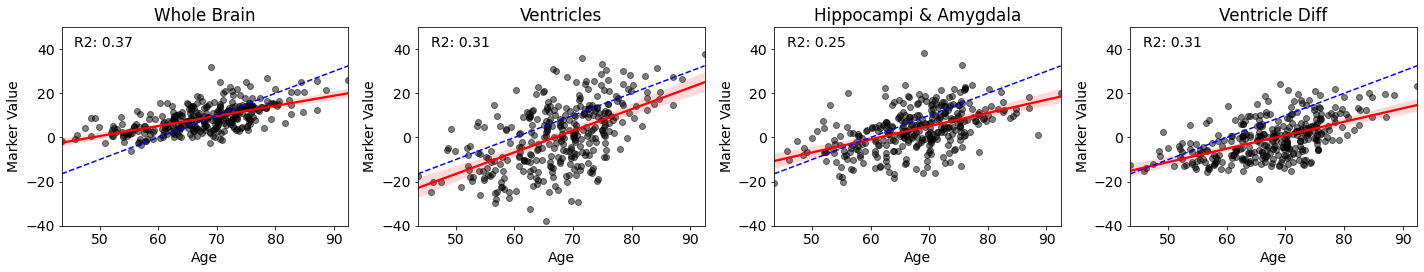

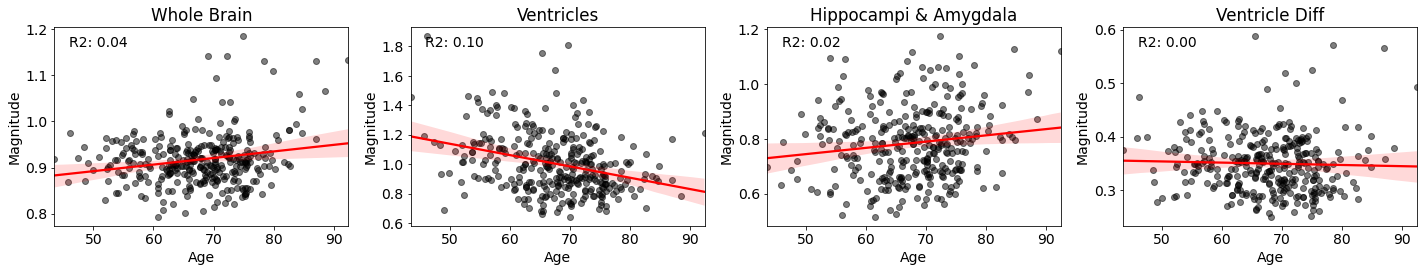

In [50]:
# 1. test biomarker-age relations
def plot_1x4_fitted_line(df, th, component, save_name, y_label = 'Marker Value',ci=80, opt_th_flag = False):
    plt.rcParams.update({'font.size': 14})
    
    df = df.drop(df[(df.disease_condition == 1)].index)
    
    # Define the line equation
    line_eq = lambda x: x - 60

    # Plot the data points and the linear line
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

    # Iterate over each subplot
    plot_titles = ["Whole Brain", "Ventricles", "Hippocampi & Amygdala", "Ventricle Diff"]
    for i, ax in enumerate(axs):
        if opt_th_flag:
            # Get the column name based on the subplot index
            column_name = f'wb_t{component}_{th[0]}' if i == 0 else f'ven_t{component}_{th[1]}' if i == 1 else f'hipp_t{component}_{th[2]}' if i == 2 else f'vendiff_t{component}_{th[3]}'
        else:
            # Get the column name based on the subplot index
            column_name = f'wb_t{component}_{th}' if i == 0 else f'ven_t{component}_{th}' if i == 1 else f'hipp_t{component}_{th}' if i == 2 else f'vendiff_t{component}_{th}'

        # Plot the data points and the linear line
        sns.regplot(x='subject_ages', y=column_name, data=df, ax=ax,
                    scatter_kws={"color": "black", "alpha": 0.5},
                    line_kws={"color": "red"},
                    ci=ci)
        
        if component == 'hc':
            # Add the line with the equation y = x - 60
            x_vals = np.array(ax.get_xlim())
            ax.plot(x_vals, line_eq(x_vals), linestyle='dashed', color='blue')
            ax.set_ylim([-40, 50])
            
        # Calculate R2 value
        x = df['subject_ages']
        y = df[column_name]
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        r_squared = r_value ** 2

        # Set the title and axis labels for the current subplot
        ax.set_title(plot_titles[i])
        ax.set_ylabel(y_label)
        ax.set_xlabel('Age')

        # Add the R2 value to the legend
        legend_text = f"R2: {r_squared:.2f}"
        
        # Add the R-squared value to the plot
        ax.text(0.25, 0.9, f"R2: {r_squared:.2f}", transform=ax.transAxes, ha='right')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show()

datasets = pd.read_csv(csv_path)
opt_th = ['0.9', '0.2', '0.9', '0.0']
plot_1x4_fitted_line(datasets, opt_th, 'hc', f'HC_marker_fittedline_at_optimal_quatile',  ci=99, opt_th_flag = True)

plot_1x4_fitted_line(datasets, opt_th, 'ad', f'HC_marker_fittedline_ad_component_at_optimal_quatile', y_label = 'Magnitude', ci=99, opt_th_flag = True)

# for th in ['0.0', '0.9']:
#     plot_1x4_fitted_line(datasets, th, f'HC_marker_fittedline_at{th}_11interval',  ci=99)

In [4]:
# 1.2 test filtering R2 scores and MSE with y=x-60
def calculate_R2_MSE(df, th):
    from sklearn.metrics import mean_squared_error
    df = df.drop(df[(df.disease_condition == 1)].index)
    
    # Iterate over each subplot
    plot_titles = ["Whole Brain", "Ventricles", "Hippocampi & Amygdala", "Ventricle Diff"]
    r_square_4regions = []
    mse_4regions = []
    for i in range(4):
        # Get the column name based on the subplot index
        column_name = f'wb_thc_{th}' if i == 0 else f'ven_thc_{th}' if i == 1 else f'hipp_thc_{th}' if i == 2 else f'vendiff_thc_{th}'
 
        # Calculate R2 value
        x = df['subject_ages']
        y = df[column_name]
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        r_squared = r_value ** 2
        r_square_4regions.append(r_squared)
        
        # Calculate MSE
        mse_4regions.append(mean_squared_error(df['subject_ages'] - 60, df[column_name], squared = False))

    return r_square_4regions, mse_4regions

datasets = pd.read_csv(csv_path)
thres = [i*0.1 for i in range(10)] # + [0.99]
r_sqr_wb = []
r_sqr_ven= []
r_sqr_hip= []
r_sqr_vendiff = []

mse_wb = []
mse_ven= []
mse_hip= []
mse_vendiff = []
for th in thres:
    r_square_4regions, mse_4regions = calculate_R2_MSE(datasets, th)
    r_sqr_wb.append(r_square_4regions[0])
    r_sqr_ven.append(r_square_4regions[1])
    r_sqr_hip.append(r_square_4regions[2])
    r_sqr_vendiff.append(r_square_4regions[3])
    
    mse_wb.append(mse_4regions[0])
    mse_ven.append(mse_4regions[1])
    mse_hip.append(mse_4regions[2])
    mse_vendiff.append(mse_4regions[3])

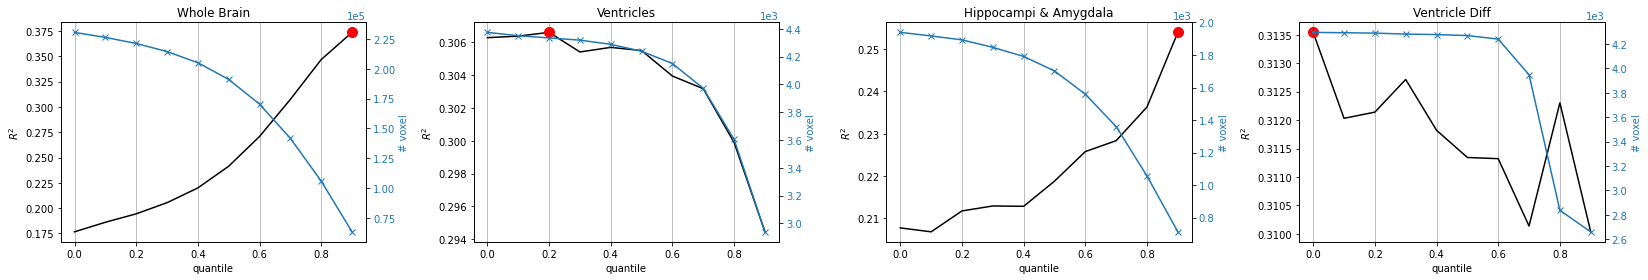

In [24]:
# Create a 1x4 plot
fig, axes = plt.subplots(1, 4, figsize=(23, 4))

# Data for plotting R-square
r_square_data = [r_sqr_wb, r_sqr_ven, r_sqr_hip, r_sqr_vendiff]
plot_titles = ["Whole Brain", "Ventricles", "Hippocampi & Amygdala", "Ventricle Diff"]

# Plot R-square for each region
for i, r_square_values in enumerate(r_square_data):
    ax = axes[i]  # Get the corresponding axis for the subplot
    ax.plot(thres, r_square_values, color='black')
    ax.set_title(plot_titles[i])
    ax.set_xlabel("quantile")
    ax.set_ylabel('$R^2$', color='black')
    
    # Highlight the highest value
    max_r_square_index = np.argmax(r_square_values)
    ax.plot(thres[max_r_square_index], r_square_values[max_r_square_index], marker='o', markersize=10, color='red')

    # Plot twin figure
    data2 = []
    for th in thres:
        column_name = f'wb_maskNum_{th}' if i == 0 else f'ven_maskNum_{th}' if i == 1 else f'hipp_maskNum_{th}' if i == 2 else f'vendiff_maskNum_{th}'
        data2.append(datasets[column_name][0])
 
    ax2 = ax.twinx()  # Instantiate a second axis that shares the same x-axis
    ax2.plot(thres, data2, marker='x', color='tab:blue')
    ax2.set_ylabel('# voxel', color='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
    # Add grid to shared x-axis
    ax.grid(True,axis='x')
    
plt.tight_layout()

# Save the plot
plt.savefig(f'./outputs/R_square_vox_numb.png', bbox_inches='tight')

# Show the plot
plt.show()


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

CN vs. AD: t-test independent samples, P_val:6.567e-60 t=-1.747e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 0.5: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=1.152e+00
0.5 vs. 1.0: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=-4.005e-01
1.0 vs. 2.0: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=6.830e-01
0.0 vs. 1.0: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=4.070e-01
0.5 vs. 2.0: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=6.474e-01
0.0 vs. 2.0: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=8.7

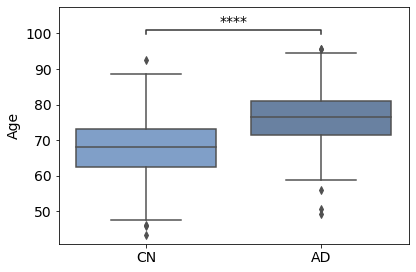

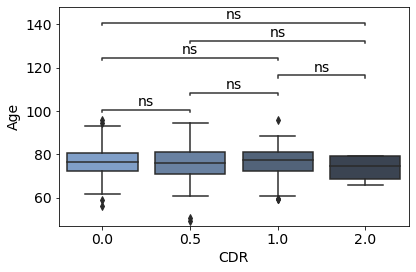

In [63]:
# 2. test age dist
def plot_age_dist_CN_vs_AD(df, save_name):
    from statannotations.Annotator import Annotator
    df['disease_categroy'] = df['disease_condition'].apply(lambda x: 'CN' if x == 0 else 'AD')    
    plt.rcParams.update({'font.size': 14})
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)
    
    # Decide which pairs of data to annotate
    plotting_parameters = {
    'data':    df,
    'x':       'disease_categroy',
    'y':       'subject_ages',
    'palette': subcat_palette[1:],
    'order':   ['CN', 'AD']
    }
    
    pairs = [('CN', 'AD')] 
 
    # Create new plot
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

    # Plot with seaborn
    sns.boxplot(**plotting_parameters)

    # Add annotations
    annotator = Annotator(axs, pairs, **plotting_parameters)
    annotator.configure(test='t-test_ind', verbose=True).apply_and_annotate()

    # Label and show
    axs.set_ylabel('Age')
    axs.set_xlabel('')
    
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show
    
def plot_age_dist_AD_CDR(df, save_name):
    import statsmodels
    from statannotations.Annotator import Annotator
    df = df.drop(df[(df.disease_condition == 0)].index)
    df['disease_categroy'] = np.where((df.disease_condition == 0), 'CN', df.scan_cdr)
    
    plt.rcParams.update({'font.size': 14})
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)
    
    # Decide which pairs of data to annotate
    plotting_parameters = {
    'data':    df,
    'x':       'disease_categroy',
    'y':       'subject_ages',
    'palette': subcat_palette[1:],
#     'order':   [0.0, 0.5, 1.0, 2.0]
    }
    
    pairs = [("0.0", "0.5"),
             ("0.0", "1.0"),
             ("0.0", "2.0"),
             ("0.5", "1.0"),
             ("0.5", "2.0"),
             ("1.0", "2.0"),
            ] 
    
#     pairs = [(0.0, 0.5),
#              (0.0, 1.0),
#              (0.0, 2.0),
#              (0.5, 1.0),
#              (0.5, 2.0),
#              (1.0, 2.0),
#             ] 
        
    # Create new plot
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

    # Plot with seaborn
    sns.boxplot(**plotting_parameters)

    # Add annotations
    annotator = Annotator(axs, pairs, **plotting_parameters)
    annotator.configure(test='t-test_ind', comparisons_correction="bonferroni", verbose=True).apply_and_annotate()

    # Label and show
    axs.set_ylabel('Age')
    axs.set_xlabel('CDR')
    
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show  
    
datasets = pd.read_csv(csv_path)
plot_age_dist_CN_vs_AD(datasets, 'Age_distributions_CN_vs_AD')
plot_age_dist_AD_CDR(datasets, 'Age_distributions_ADcohorts')

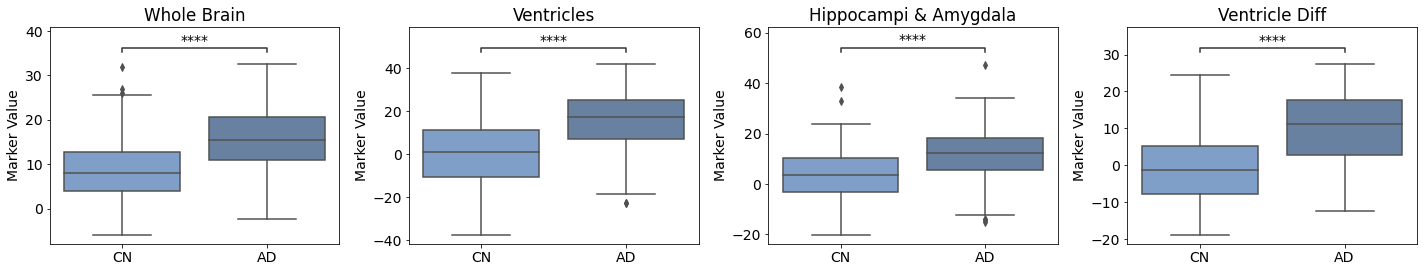

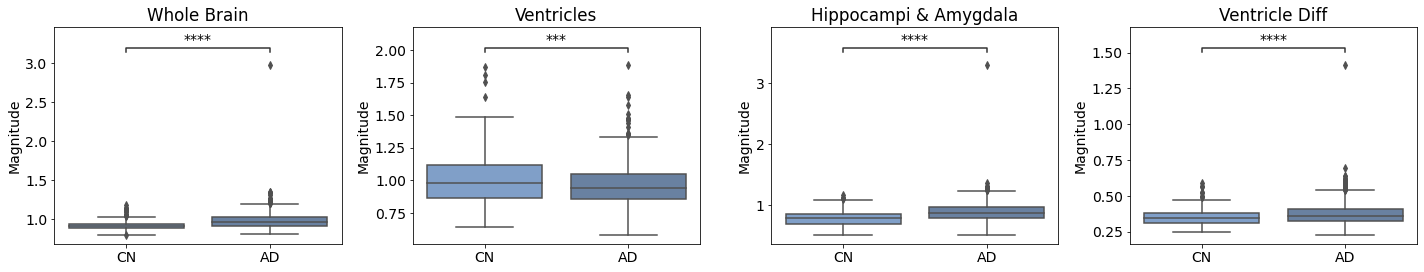

In [51]:
# 3.1. compare CN with AD using biomarker
def plot_1x4_CN_vs_AD(df, th, component, save_name, y_label = 'Marker Value', opt_th_flag = False):
    import statsmodels
    from statannotations.Annotator import Annotator
    df['disease_categroy'] = np.where((df.disease_condition == 0), 'CN', 'AD')
    
    plt.rcParams.update({'font.size': 14})
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)
    
    # Decide which pairs of data to annotate
    plotting_parameters = {
    'data':    df,
    'x':       'disease_categroy',
    'palette': subcat_palette[1:],
    'order':   ['CN', "AD"]
    }
    
    pairs = [('CN', 'AD')] 
 
    # Plot the data points and the linear line
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

    # Iterate over each subplot
    plot_titles = ["Whole Brain", "Ventricles", "Hippocampi & Amygdala", "Ventricle Diff"]
    for i, ax in enumerate(axs):
        if opt_th_flag:
            # Get the column name based on the subplot index
            column_name = f'wb_t{component}_{th[0]}' if i == 0 else f'ven_t{component}_{th[1]}' if i == 1 else f'hipp_t{component}_{th[2]}' if i == 2 else f'vendiff_t{component}_{th[3]}'
        else:
            # Get the column name based on the subplot index
            column_name = f'wb_t{component}_{th}' if i == 0 else f'ven_t{component}_{th}' if i == 1 else f'hipp_t{component}_{th}' if i == 2 else f'vendiff_t{component}_{th}'

        # Plot with seaborn
        sns.boxplot(y=column_name, **plotting_parameters, ax=ax)

        # Add annotations
        annotator = Annotator(ax, pairs, y=column_name, **plotting_parameters)
        annotator.configure(test='t-test_ind', comparisons_correction="bonferroni", verbose=False).apply_and_annotate()


        # Set the title and axis labels for the current subplot
        ax.set_title(plot_titles[i])
        ax.set_ylabel(y_label)
        ax.set_xlabel('')
        
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show()

datasets = pd.read_csv(csv_path)
opt_th = ['0.9', '0.2', '0.9', '0.0']
plot_1x4_CN_vs_AD(datasets, opt_th, 'hc', f'CNAD_marker_at_optimal_quantile', opt_th_flag = True)
plot_1x4_CN_vs_AD(datasets, opt_th, 'ad', f'CNAD_marker_ad_at_optimal_quantile', y_label = 'Magnitude', opt_th_flag = True)

# for th in ['0.0', '0.9']:
#     plot_1x4_CN_vs_AD(datasets, th, f'CNAD_marker_at{th}_11interval')

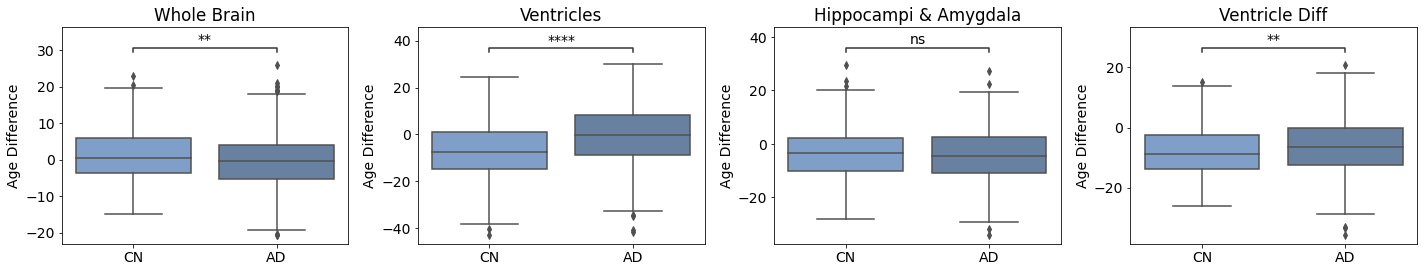

In [40]:
# 3.2. compare CN with AD using age diff 
def plot_1x4_CN_vs_AD_age_diff(df, th, save_name, opt_th_flag = False):
    import statsmodels
    from statannotations.Annotator import Annotator
    df['disease_categroy'] = np.where((df.disease_condition == 0), 'CN', 'AD')
    if opt_th_flag:
        df[f'wb_thc_{th[0]}_diff']= df[f'wb_thc_{th[0]}'] - df['subject_ages'] + 60
        df[f'ven_thc_{th[1]}_diff']= df[f'ven_thc_{th[1]}'] - df['subject_ages'] + 60
        df[f'hipp_thc_{th[2]}_diff']= df[f'hipp_thc_{th[2]}'] - df['subject_ages'] + 60
        df[f'vendiff_thc_{th[3]}_diff']= df[f'vendiff_thc_{th[3]}'] - df['subject_ages'] + 60
    else:
        df[f'wb_thc_{th}_diff']= df[f'wb_thc_{th}'] - df['subject_ages'] + 60
        df[f'ven_thc_{th}_diff']= df[f'ven_thc_{th}'] - df['subject_ages'] + 60
        df[f'hipp_thc_{th}_diff']= df[f'hipp_thc_{th}'] - df['subject_ages'] + 60
        df[f'vendiff_thc_{th}_diff']= df[f'vendiff_thc_{th}'] - df['subject_ages'] + 60
    
    plt.rcParams.update({'font.size': 14})
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)
    
    # Decide which pairs of data to annotate
    plotting_parameters = {
    'data':    df,
    'x':       'disease_categroy',
    'palette': subcat_palette[1:],
    'order':   ['CN', "AD"]
    }
    
    pairs = [('CN', 'AD')] 
 
    # Plot the data points and the linear line
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

    # Iterate over each subplot
    plot_titles = ["Whole Brain", "Ventricles", "Hippocampi & Amygdala", "Ventricle Diff"]
    for i, ax in enumerate(axs):
        if opt_th_flag:
            # Get the column name based on the subplot index
            column_name = f'wb_thc_{th[0]}_diff' if i == 0 else f'ven_thc_{th[1]}_diff' if i == 1 else f'hipp_thc_{th[2]}_diff' if i == 2 else f'vendiff_thc_{th[3]}_diff'
        else:
            # Get the column name based on the subplot index
            column_name = f'wb_thc_{th}_diff' if i == 0 else f'ven_thc_{th}_diff' if i == 1 else f'hipp_thc_{th}_diff' if i == 2 else f'vendiff_thc_{th}_diff'

        # Plot with seaborn
        sns.boxplot(y=column_name, **plotting_parameters, ax=ax)

        # Add annotations
        annotator = Annotator(ax, pairs, y=column_name, **plotting_parameters)
        annotator.configure(test='t-test_ind', comparisons_correction="bonferroni", verbose=False).apply_and_annotate()


        # Set the title and axis labels for the current subplot
        ax.set_title(plot_titles[i])
        ax.set_ylabel('Age Difference')
        ax.set_xlabel('')
        
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show()
    
datasets = pd.read_csv(csv_path)
opt_th = ['0.9', '0.2', '0.9', '0.0']
plot_1x4_CN_vs_AD_age_diff(datasets, opt_th, f'CNAD_age_diff_at_optimal_quantile', opt_th_flag = True)

# for th in ['0.0', '0.9']:
#     plot_1x4_CN_vs_AD_age_diff(datasets, th, f'CNAD_age_diff_at{th}_11interval')

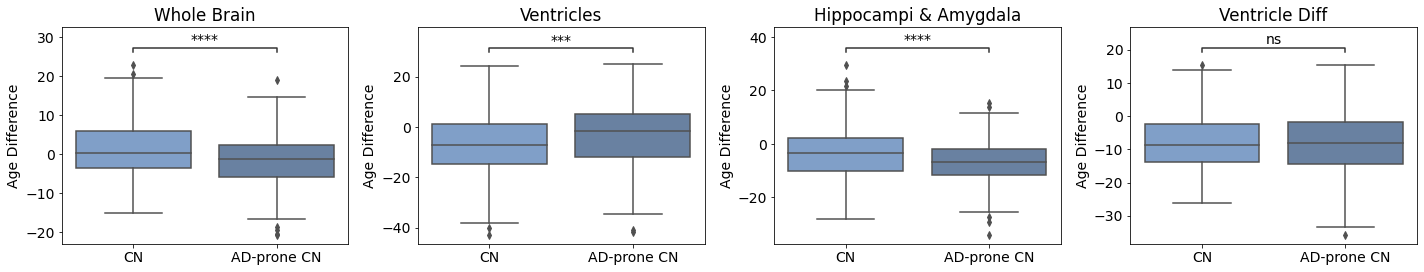

In [43]:
# 4.2. compare CN with with AD-prone CN using age diff 
def plot_1x4_CN_vs_AD_age_diff(df, th, save_name, opt_th_flag = False):
    import statsmodels
    from statannotations.Annotator import Annotator
    df = df.drop(df[(df.disease_condition == 1) & (df.scan_cdr != 0)].index)
    df['disease_categroy'] = np.where((df.disease_condition == 0), 'CN', 'AD-prone CN')
    if opt_th_flag:
        df[f'wb_thc_{th[0]}_diff']= df[f'wb_thc_{th[0]}'] - df['subject_ages'] + 60
        df[f'ven_thc_{th[1]}_diff']= df[f'ven_thc_{th[1]}'] - df['subject_ages'] + 60
        df[f'hipp_thc_{th[2]}_diff']= df[f'hipp_thc_{th[2]}'] - df['subject_ages'] + 60
        df[f'vendiff_thc_{th[3]}_diff']= df[f'vendiff_thc_{th[3]}'] - df['subject_ages'] + 60
    else:
        df[f'wb_thc_{th}_diff']= df[f'wb_thc_{th}'] - df['subject_ages'] + 60
        df[f'ven_thc_{th}_diff']= df[f'ven_thc_{th}'] - df['subject_ages'] + 60
        df[f'hipp_thc_{th}_diff']= df[f'hipp_thc_{th}'] - df['subject_ages'] + 60
        df[f'vendiff_thc_{th}_diff']= df[f'vendiff_thc_{th}'] - df['subject_ages'] + 60
    
    plt.rcParams.update({'font.size': 14})
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)
    
    # Decide which pairs of data to annotate
    plotting_parameters = {
    'data':    df,
    'x':       'disease_categroy',
    'palette': subcat_palette[1:],
    'order':   ['CN', "AD-prone CN"]
    }
    
    pairs = [('CN', 'AD-prone CN')] 
 
    # Plot the data points and the linear line
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

    # Iterate over each subplot
    plot_titles = ["Whole Brain", "Ventricles", "Hippocampi & Amygdala", "Ventricle Diff"]
    for i, ax in enumerate(axs):
        if opt_th_flag:
            # Get the column name based on the subplot index
            column_name = f'wb_thc_{th[0]}_diff' if i == 0 else f'ven_thc_{th[1]}_diff' if i == 1 else f'hipp_thc_{th[2]}_diff' if i == 2 else f'vendiff_thc_{th[3]}_diff'
        else:
            # Get the column name based on the subplot index
            column_name = f'wb_thc_{th}_diff' if i == 0 else f'ven_thc_{th}_diff' if i == 1 else f'hipp_thc_{th}_diff' if i == 2 else f'vendiff_thc_{th}_diff'

        # Plot with seaborn
        sns.boxplot(y=column_name, **plotting_parameters, ax=ax)

        # Add annotations
        annotator = Annotator(ax, pairs, y=column_name, **plotting_parameters)
        annotator.configure(test='t-test_ind', comparisons_correction="bonferroni", verbose=False).apply_and_annotate()


        # Set the title and axis labels for the current subplot
        ax.set_title(plot_titles[i])
        ax.set_ylabel('Age Difference')
        ax.set_xlabel('')
        
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show()
    
datasets = pd.read_csv(csv_path)
opt_th = ['0.9', '0.2', '0.9', '0.0']
plot_1x4_CN_vs_AD_age_diff(datasets, opt_th, f'CN_ADproneCN__age_diff_at_optimal_quantile', opt_th_flag = True)

# for th in ['0.0', '0.9']:
#     plot_1x4_CN_vs_AD_age_diff(datasets, th, f'CN_ADproneCN__age_diff_at{th}_11interval')

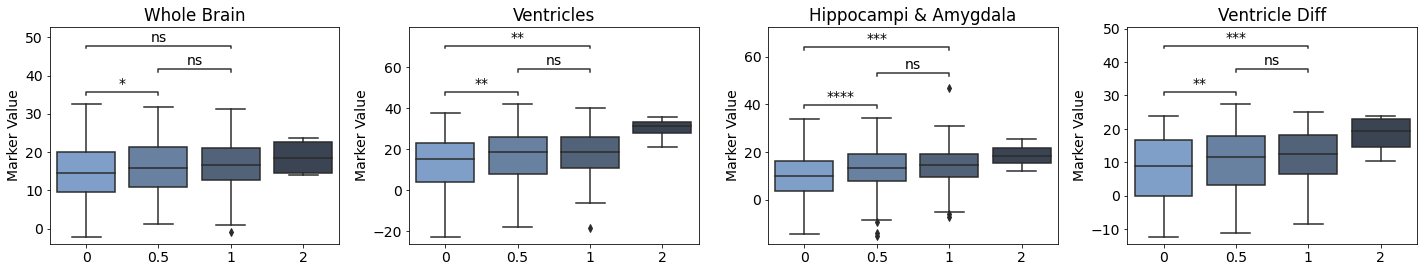

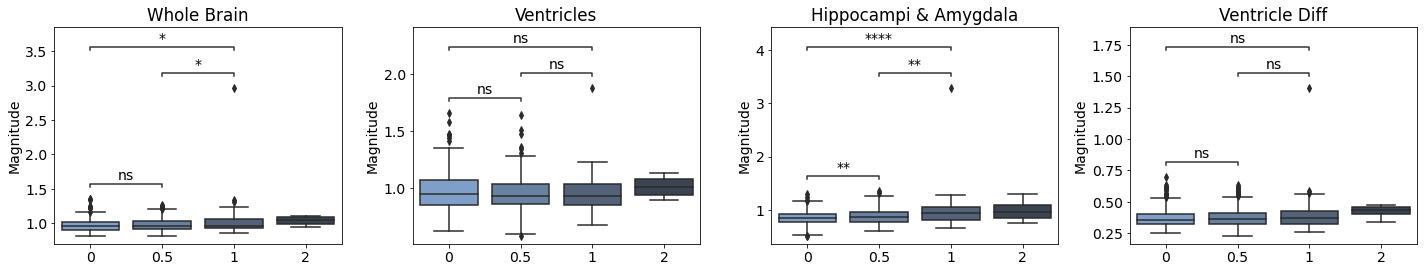

In [52]:
# 5. compare AD stages according to CDR using biomarker
def plot_age_dist_AD_CDR(df, th, component, save_name, y_label = 'Marker Value', opt_th_flag = False):
    import statsmodels
    from statannotations.Annotator import Annotator

    plt.rcParams.update({'font.size': 14})
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)
    
#     df['disease_categroy'] = np.where((df.disease_condition == 0), 'CN', df.scan_cdr)
#     # Decide which pairs of data to annotate
#     plotting_parameters = {
#     'data':    df,
#     'x':       'disease_categroy',
#     'palette': subcat_palette[1:],
#     'order':   ['CN', "0.0", "0.5", "1.0", "2.0"]
#     }
    
#     pairs = [('0.0', '0.5'),
#              ('0.0', '1.0'),
#              ('0.5', '1.0'),
#             ] 

    df = df.drop(df[df.disease_condition == 0].index)
    
    # Decide which pairs of data to annotate
    plotting_parameters = {
    'data':    df,
    'x':       'scan_cdr',
    'palette': subcat_palette[1:],
    'order':   [0, 0.5, 1, 2]
    }
    
    pairs = [(0, 0.5),
             (0, 1),
             (0.5, 1),
            ] 

    # Plot the data points and the linear line
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

    # Iterate over each subplot
    plot_titles = ["Whole Brain", "Ventricles", "Hippocampi & Amygdala", "Ventricle Diff"]
    for i, ax in enumerate(axs):
        if opt_th_flag:
            # Get the column name based on the subplot index
            column_name = f'wb_t{component}_{th[0]}' if i == 0 else f'ven_t{component}_{th[1]}' if i == 1 else f'hipp_t{component}_{th[2]}' if i == 2 else f'vendiff_t{component}_{th[3]}'
        else:
            # Get the column name based on the subplot index
            column_name = f'wb_t{component}_{th}' if i == 0 else f'ven_t{component}_{th}' if i == 1 else f'hipp_t{component}_{th}' if i == 2 else f'vendiff_t{component}_{th}'

        # Plot with seaborn
        sns.boxplot(y=column_name, **plotting_parameters, ax=ax)

        # Add annotations
        annotator = Annotator(ax, pairs, y=column_name, **plotting_parameters)
        annotator.configure(test='t-test_ind', comparisons_correction="bonferroni", verbose=False).apply_and_annotate()


        # Set the title and axis labels for the current subplot
        ax.set_title(plot_titles[i])
        ax.set_ylabel(y_label)
        ax.set_xlabel('')
        
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show()
    
datasets = pd.read_csv(csv_path)
opt_th = ['0.9', '0.2', '0.9', '0.0']
plot_age_dist_AD_CDR(datasets, opt_th, 'hc', f'AD_markers_at_optimal_quantile', opt_th_flag = True)
plot_age_dist_AD_CDR(datasets, opt_th, 'ad', f'AD_markers_ad_at_optimal_quantile', y_label = 'Magnitude', opt_th_flag = True)

# for th in ['0.0','0.5','0.8','0.99']:
#     plot_age_dist_AD_CDR(datasets, th, f'AD_markers_at{th}_11interval')